In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wandb

# Dataset 상속
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torch
from torch.autograd import Variable
from torch import Tensor
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler

In [703]:
df['spin_rate'][0].reshape(-1,1).shape

(1, 1)

In [2]:
path = '/home/ines/github/DL_projects/lstm_short_game_golf/trainset_xyz_90'
file = 'set0.txt'
file = os.path.join(path, file)
df = pd.read_csv(file, sep=',', names = ['x','y','z','initial_velocity','launch_angle','spin_axis','xz_theta', 'spin_rate'])

cols = ['x','y','z']
df_extract = pd.DataFrame(df[cols])[0:10].transpose()
#df_extract = np.concatenate((df_extract, df['spin_rate'][0].reshape(-1,1)), axis=1)

df_extract.shape

(3, 10)

In [805]:
df.head()

,x,y,z,initial_velocity,launch_angle,spin_axis,xz_theta,spin_rate
0,0.000000,0.000000,0.000000,80.389577,16.704223,-1.40274,3.896552,3496.61403
1,2.519276,0.755746,0.172595,80.389577,16.704223,-1.40274,3.896552,3496.61403
2,5.006577,1.507463,0.344840,80.389577,16.704223,-1.40274,3.896552,3496.61403
3,7.461811,2.264460,0.516537,80.389577,16.704223,-1.40274,3.896552,3496.61403
4,9.885697,3.026348,0.687694,80.389577,16.704223,-1.40274,3.896552,3496.61403


In [726]:
import os
from sklearn.preprocessing import MinMaxScaler

path = '/home/ines/github/DL_projects/lstm_short_game_golf/trainset_xyz_90'
for i in range(1, 5001):
    file = 'set{}.txt'.format(i)
    file = os.path.join(path, file)
    
    df = pd.read_csv(file, sep= ',', names = ['x', 'y', 'z','initial_velocity','launch_angle','spin_axis','xz_theta', 'spin_rate'])
    #df = scaler.fit_transform(df)
    
    df_arr = pd.DataFrame(df[cols])[0:10].transpose()
    #df_arr = np.concatenate((df_arr, df['spin_rate'][0].reshape(1,1)),axis=1)
    df_extract = np.concatenate((df_extract, df_arr), axis=0)

print(df_extract.shape)
print('fin')

(15003, 10)
fin


In [727]:
'''
Normalziation part
- x,y,z 각각에 미분값 넣어주기
- j => range([2~0][5~3][8~6])
- 미분값 1-0 2-1 3-2
'''
print(df_extract[0][0:10])
print(df_extract[1][0:10])
print(df_extract[2][0:10])

for i in range(len(df_extract)-1):
    for j in range(9,0,-1):
        df_extract[i][j] = df_extract[i][j] - df_extract[i][j-1]
        #print(df_extract[i][j])

print('----------------')
print(df_extract[0][0:10])
print(df_extract[1][0:10])
print(df_extract[2][0:10])

[ 0.          1.84857444  3.67849293  5.48905063  7.28059828  9.05347876
 10.80802638 12.54456714 14.26341911 15.96489269]
[0.         0.74228032 1.47761376 2.21253493 2.94685543 3.68038527
 4.41293928 5.1443371  5.87440303 6.602966  ]
[0.         0.14236608 0.28447467 0.42617509 0.56747212 0.70837064
 0.84887545 0.9889913  1.12872283 1.26807461]
----------------
[0.         1.84857444 1.8299185  1.8105577  1.79154765 1.77288049
 1.75454761 1.73654076 1.71885197 1.70147358]
[0.         0.74228032 0.73533344 0.73492117 0.7343205  0.73352984
 0.73255402 0.73139782 0.73006593 0.72856297]
[0.         0.14236608 0.14210859 0.14170043 0.14129703 0.14089852
 0.14050482 0.14011585 0.13973153 0.13935178]


In [729]:
path = '/home/ines/github/DL_projects/lstm_short_game_golf/trainset_xyz_90'
file = 'set0.txt'
file = os.path.join(path, file)
df = pd.read_csv(file, sep=',', names = ['x','y','z','initial_velocity','launch_angle','spin_axis','xz_theta', 'spin_rate'])

#cols = ['x','y','z']
#df_extract = pd.DataFrame(df[cols])[0:10].transpose()
label_df = df['spin_rate'][0].reshape(-1,1)

print(label_df.shape)


path = '/home/ines/github/DL_projects/lstm_short_game_golf/trainset_xyz_90'
for i in range(1, 5001):
    file = 'set{}.txt'.format(i)
    file = os.path.join(path, file)
    
    df = pd.read_csv(file, sep= ',', names = ['x', 'y', 'z','initial_velocity','launch_angle','spin_axis','xz_theta', 'spin_rate'])
    #df = scaler.fit_transform(df)
    
    label_arr = df['spin_rate'][0].reshape(-1,1)
    label_df = np.concatenate((label_df, label_arr),axis=0)
    #df_extract = np.concatenate((df_extract, df_arr), axis=0)

print(label_df.shape)
print('fin')

(1, 1)
(5001, 1)
fin


In [730]:
label_df[:]

array([[4110.95705873],
       [5474.88465098],
       [4707.68166326],
       ...,
       [4686.59584697],
       [2891.85309981],
       [3496.61403041]])

In [731]:
'''
Normalization label parameter
- Normalize label parameters
(spin rate, spin axis, launch angle, initial velocity, xz theta)
'''
scaler = MinMaxScaler()
scaler.fit(label_df[:])
scaled_df_extract = scaler.transform(label_df[:])
scaled_df_extract

array([[0.43590591],
       [0.84321401],
       [0.61410508],
       ...,
       [0.60780825],
       [0.07184632],
       [0.25244537]])

In [734]:
print(df_extract.shape)
scaled_df_extract.shape

(15003, 10)


(5001, 1)

In [746]:
test_size = 501

train_dataset = scaled_df_extract[:-test_size]
test_dataset = scaled_df_extract[-test_size:]

label_size = 1503
train_label = df_extract[:-label_size]
test_label = df_extract[-label_size:]

print('Training set:',train_dataset.shape)
print('Testing set:',test_dataset.shape)
print('Training label set:',train_label.shape)
print('Testing label set:',test_label.shape)

Training set: (4500, 1)
Testing set: (501, 1)
Training label set: (13500, 10)
Testing label set: (1503, 10)


In [ ]:
#sample, sequence length, features

In [684]:
len(train_label[:])
len(test_label[:])

500

In [741]:
'''
batch_size, sequence length, features
'''
import torch
from torch.autograd import Variable

train_feature_tensors = Variable(torch.Tensor(train_dataset[:]))
train_label_tensors = Variable(torch.Tensor(train_label[:])).unsqueeze(dim=1)

test_feature_tensors = Variable(torch.Tensor(test_dataset[:]))
test_label_tensors = Variable(torch.Tensor(test_label[:])).unsqueeze(dim=1)

train_feature_tensors_f = torch.reshape(train_feature_tensors, 
                                  (train_feature_tensors.shape[0]//3,train_feature_tensors.shape[1],3))

test_feature_tensors_f = torch.reshape(test_feature_tensors,
                                (test_feature_tensors.shape[0]//3,test_feature_tensors.shape[1],3))

print('Training Shape :', train_feature_tensors_f.shape, train_label_tensors.shape)
print('Testing Shape :', test_feature_tensors_f.shape, test_label_tensors.shape)

Training Shape : torch.Size([1500, 1, 3]) torch.Size([13500, 1, 10])
Testing Shape : torch.Size([167, 1, 3]) torch.Size([1503, 1, 10])


In [763]:
'''
LSTM 좌표 예측용 !!!
batch_size, sequence length, features
'''
import torch
from torch.autograd import Variable

train_feature_tensors = Variable(torch.Tensor(train_dataset[:])).unsqueeze(dim=1)
train_label_tensors = Variable(torch.Tensor(train_label[:]))

test_feature_tensors = Variable(torch.Tensor(test_dataset[:])).unsqueeze(dim=1)
test_label_tensors = Variable(torch.Tensor(test_label[:]))

train_label_tensors_f = torch.reshape(train_label_tensors,
                                   (train_label_tensors.shape[0]//3, train_label_tensors.shape[1],3))

test_label_tensors_f = torch.reshape(test_label_tensors,
                                   (test_label_tensors.shape[0]//3, test_label_tensors.shape[1],3))

#train_feature_tensors_f = torch.reshape(train_feature_tensors, 
#                                  (train_feature_tensors.shape[0],train_feature_tensors.shape[1],1))

#test_feature_tensors_f = torch.reshape(test_feature_tensors,
#                                (test_feature_tensors.shape[0],test_feature_tensors.shape[1],1))

print('Training Shape :', train_feature_tensors.shape, train_label_tensors_f.shape)
print('Testing Shape :', test_feature_tensors.shape, test_label_tensors_f.shape)

Training Shape : torch.Size([4500, 1, 1]) torch.Size([4500, 10, 3])
Testing Shape : torch.Size([501, 1, 1]) torch.Size([501, 10, 3])


In [764]:
# Dataset 상속
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset): 
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
    
    # 총 데이터의 개수를 리턴
    def __len__(self): 
        return len(self.x_data)
    
    # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx,:])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [768]:
train_feature_tensors_f.shape

torch.Size([1500, 1, 3])

In [785]:
from sklearn.model_selection import train_test_split

train_feature = train_feature_tensors
train_label = train_label_tensors_f

x_train, x_valid, y_train,y_valid = train_test_split(train_feature, train_label,test_size=0.2)
print('Training Shape:',x_train.shape, y_train.shape)
print('Validation Shape:',x_valid.shape, y_valid.shape)

train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(test_feature_tensors, test_label_tensors_f)
valid_dataset = CustomDataset(x_valid, y_valid)

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=True)

Training Shape: torch.Size([3600, 1, 1]) torch.Size([3600, 10, 3])
Validation Shape: torch.Size([900, 1, 1]) torch.Size([900, 10, 3])


In [786]:
class LSTM_model(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM_model, self).__init__()
        self.num_classes = num_classes # 클래스
        self.num_layers = num_layers # LSTM 계층 개수
        self.input_size = input_size  # 입력 크기(컬럼 개수)
        self.hidden_size = hidden_size # 은닉층의 뉴런 개수
        self.seq_length = seq_length # 시퀀스 길이
        self.fc_2 =  nn.Linear(input_size*seq_length, 128)

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) # lstm 계층
        self.fc_1 =  nn.Linear(hidden_size, 128) # 완전연결층
        self.fc = nn.Linear(128, num_classes) # 출력층

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).cuda() # 은닉상태 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).cuda() # 셀 상태 초기화
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # lstm 계층에 은닉 상태와 셀 상태 적용
        hn = hn.view(-1, self.hidden_size) # 완전연결층 적용을 위해 데이터 형태를 1차원으로 조정
        #out = self.fc_2(x)
        out = self.relu(hn)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out)
        return out

In [772]:
train_feature_tensors.shape

torch.Size([4500, 1, 1])

In [803]:
lr = 0.0001
nb_epochs = 10000

input_size=1 # 칼럼 개수
hidden_size=128 # 은닉층 유닛 개수
num_layers=1 # LSTM 계층 개수

num_classes=3 # 클래스 개수

wandb.config = {
  "learning_rate": lr,
  "epochs": nb_epochs,
  "batch_size": 256
}
#sample = torch.randn(1,30)

model = LSTM_model(num_classes, input_size, hidden_size, num_layers, train_feature_tensors_f.shape[1]).cuda()
#predict = model(sample.cuda())
#print(predict.shape)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [691]:
y_train.cuda().shape

torch.Size([3600, 1, 1])

In [692]:
x_train.shape

torch.Size([3600, 10, 3])

In [804]:
train_loss = []
valid_list = []
train_dataset = []
train_prediction = []

wandb.init(project='test-project', entity='ines-kwak', reinit=True)

for epoch in range(nb_epochs + 1):
    
    model.train()
    
    for batch_idx, samples in enumerate(train_dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        x_train=x_train.cuda()
        y_train=y_train.cuda()[:,0]
        
        
        # H(x) 계산
        prediction = model(x_train)
        
        
        
        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        

        #train_prediction.append(prediction.cpu())
        
        if batch_idx % 10 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, nb_epochs, batch_idx+1, len(train_dataloader),
                cost.item()
                ))
        wandb.log({'train/loss': cost.item()})
        #wandb.watch(model)
        
    #    train_dataset.append(torch.flatten(y_train).cpu().numpy())
    #    train_prediction.append(torch.flatten(prediction).cpu().detach().numpy())
    #break
    
    model.eval()
    valid_cost = 0
    for batch_idx, samples in enumerate(valid_dataloader):
        x_train, y_train = samples
        x_train, y_train = x_train.cuda(),y_train.cuda()[:,0]
        valid_prediction = model(x_train)

        valid_cost += F.mse_loss(valid_prediction, y_train)
        
    
        valid_list.append(valid_cost.item())
    wandb.log({'validation/loss': valid_cost.item()})
        
    print('Cost: {:.6f}'.format(valid_cost.item()))

Epoch    0/10000 Batch 1/15 Cost: 1.973358
Epoch    0/10000 Batch 11/15 Cost: 1.938901
Cost: 109.322693
Epoch    1/10000 Batch 1/15 Cost: 2.085053
Epoch    1/10000 Batch 11/15 Cost: 1.941107
Cost: 107.708664
Epoch    2/10000 Batch 1/15 Cost: 1.911661
Epoch    2/10000 Batch 11/15 Cost: 1.825536
Cost: 107.568695
Epoch    3/10000 Batch 1/15 Cost: 1.906606
Epoch    3/10000 Batch 11/15 Cost: 1.964375
Cost: 104.966286
Epoch    4/10000 Batch 1/15 Cost: 1.865701
Epoch    4/10000 Batch 11/15 Cost: 1.911077
Cost: 103.087112
Epoch    5/10000 Batch 1/15 Cost: 1.655302
Epoch    5/10000 Batch 11/15 Cost: 1.699689
Cost: 102.328026
Epoch    6/10000 Batch 1/15 Cost: 1.864342
Epoch    6/10000 Batch 11/15 Cost: 1.792760
Cost: 100.659729
Epoch    7/10000 Batch 1/15 Cost: 1.786012
Epoch    7/10000 Batch 11/15 Cost: 1.755053
Cost: 98.283478
Epoch    8/10000 Batch 1/15 Cost: 1.746094
Epoch    8/10000 Batch 11/15 Cost: 1.721951
Cost: 96.005844
Epoch    9/10000 Batch 1/15 Cost: 1.612369
Epoch    9/10000 Batch 

Epoch   81/10000 Batch 11/15 Cost: 0.317066
Cost: 18.118782
Epoch   82/10000 Batch 1/15 Cost: 0.312892
Epoch   82/10000 Batch 11/15 Cost: 0.326401
Cost: 17.988279
Epoch   83/10000 Batch 1/15 Cost: 0.345407
Epoch   83/10000 Batch 11/15 Cost: 0.283619
Cost: 18.277996
Epoch   84/10000 Batch 1/15 Cost: 0.316716
Epoch   84/10000 Batch 11/15 Cost: 0.284119
Cost: 18.139645
Epoch   85/10000 Batch 1/15 Cost: 0.286281
Epoch   85/10000 Batch 11/15 Cost: 0.322723
Cost: 18.024723
Epoch   86/10000 Batch 1/15 Cost: 0.279592
Epoch   86/10000 Batch 11/15 Cost: 0.286434
Cost: 17.933533
Epoch   87/10000 Batch 1/15 Cost: 0.303460
Epoch   87/10000 Batch 11/15 Cost: 0.314505
Cost: 18.130489
Epoch   88/10000 Batch 1/15 Cost: 0.307626
Epoch   88/10000 Batch 11/15 Cost: 0.313408
Cost: 18.050524
Epoch   89/10000 Batch 1/15 Cost: 0.343387
Epoch   89/10000 Batch 11/15 Cost: 0.303013
Cost: 17.973194
Epoch   90/10000 Batch 1/15 Cost: 0.292452
Epoch   90/10000 Batch 11/15 Cost: 0.303669
Cost: 17.923410
Epoch   91/10

Cost: 17.450964
Epoch  162/10000 Batch 1/15 Cost: 0.300229
Epoch  162/10000 Batch 11/15 Cost: 0.301176
Cost: 17.543650
Epoch  163/10000 Batch 1/15 Cost: 0.323438
Epoch  163/10000 Batch 11/15 Cost: 0.283541
Cost: 17.581547
Epoch  164/10000 Batch 1/15 Cost: 0.287690
Epoch  164/10000 Batch 11/15 Cost: 0.335743
Cost: 17.749662
Epoch  165/10000 Batch 1/15 Cost: 0.299479
Epoch  165/10000 Batch 11/15 Cost: 0.304409
Cost: 17.678402
Epoch  166/10000 Batch 1/15 Cost: 0.314913
Epoch  166/10000 Batch 11/15 Cost: 0.294156
Cost: 17.618536
Epoch  167/10000 Batch 1/15 Cost: 0.310372
Epoch  167/10000 Batch 11/15 Cost: 0.286598
Cost: 17.710243
Epoch  168/10000 Batch 1/15 Cost: 0.306945
Epoch  168/10000 Batch 11/15 Cost: 0.327176
Cost: 17.837440
Epoch  169/10000 Batch 1/15 Cost: 0.284032
Epoch  169/10000 Batch 11/15 Cost: 0.319097
Cost: 17.654810
Epoch  170/10000 Batch 1/15 Cost: 0.285260
Epoch  170/10000 Batch 11/15 Cost: 0.283949
Cost: 17.457396
Epoch  171/10000 Batch 1/15 Cost: 0.326038
Epoch  171/100

Epoch  243/10000 Batch 11/15 Cost: 0.276108
Cost: 17.538567
Epoch  244/10000 Batch 1/15 Cost: 0.277202
Epoch  244/10000 Batch 11/15 Cost: 0.289860
Cost: 17.697630
Epoch  245/10000 Batch 1/15 Cost: 0.328541
Epoch  245/10000 Batch 11/15 Cost: 0.267165
Cost: 17.524448
Epoch  246/10000 Batch 1/15 Cost: 0.295272
Epoch  246/10000 Batch 11/15 Cost: 0.272372
Cost: 17.744253
Epoch  247/10000 Batch 1/15 Cost: 0.297880
Epoch  247/10000 Batch 11/15 Cost: 0.290786
Cost: 17.367186
Epoch  248/10000 Batch 1/15 Cost: 0.302333
Epoch  248/10000 Batch 11/15 Cost: 0.324325
Cost: 17.583721
Epoch  249/10000 Batch 1/15 Cost: 0.311584
Epoch  249/10000 Batch 11/15 Cost: 0.317704
Cost: 17.443148
Epoch  250/10000 Batch 1/15 Cost: 0.285512
Epoch  250/10000 Batch 11/15 Cost: 0.331029
Cost: 17.682957
Epoch  251/10000 Batch 1/15 Cost: 0.288895
Epoch  251/10000 Batch 11/15 Cost: 0.314284
Cost: 17.503294
Epoch  252/10000 Batch 1/15 Cost: 0.315760
Epoch  252/10000 Batch 11/15 Cost: 0.283442
Cost: 17.629770
Epoch  253/10

Cost: 17.534958
Epoch  325/10000 Batch 1/15 Cost: 0.265274
Epoch  325/10000 Batch 11/15 Cost: 0.319090
Cost: 17.343596
Epoch  326/10000 Batch 1/15 Cost: 0.287080
Epoch  326/10000 Batch 11/15 Cost: 0.285453
Cost: 17.283779
Epoch  327/10000 Batch 1/15 Cost: 0.315729
Epoch  327/10000 Batch 11/15 Cost: 0.319664
Cost: 17.465048
Epoch  328/10000 Batch 1/15 Cost: 0.307805
Epoch  328/10000 Batch 11/15 Cost: 0.310274
Cost: 17.591637
Epoch  329/10000 Batch 1/15 Cost: 0.296798
Epoch  329/10000 Batch 11/15 Cost: 0.313412
Cost: 17.651451
Epoch  330/10000 Batch 1/15 Cost: 0.302947
Epoch  330/10000 Batch 11/15 Cost: 0.314422
Cost: 17.578518
Epoch  331/10000 Batch 1/15 Cost: 0.282508
Epoch  331/10000 Batch 11/15 Cost: 0.289962
Cost: 17.549009
Epoch  332/10000 Batch 1/15 Cost: 0.311512
Epoch  332/10000 Batch 11/15 Cost: 0.315245
Cost: 17.537106
Epoch  333/10000 Batch 1/15 Cost: 0.285458
Epoch  333/10000 Batch 11/15 Cost: 0.284033
Cost: 17.527534
Epoch  334/10000 Batch 1/15 Cost: 0.300211
Epoch  334/100

Cost: 17.538567
Epoch  406/10000 Batch 1/15 Cost: 0.293933
Epoch  406/10000 Batch 11/15 Cost: 0.289476
Cost: 17.523088
Epoch  407/10000 Batch 1/15 Cost: 0.291609
Epoch  407/10000 Batch 11/15 Cost: 0.291272
Cost: 17.377811
Epoch  408/10000 Batch 1/15 Cost: 0.301378
Epoch  408/10000 Batch 11/15 Cost: 0.272743
Cost: 17.590450
Epoch  409/10000 Batch 1/15 Cost: 0.307015
Epoch  409/10000 Batch 11/15 Cost: 0.269751
Cost: 17.616713
Epoch  410/10000 Batch 1/15 Cost: 0.281652
Epoch  410/10000 Batch 11/15 Cost: 0.309661
Cost: 17.514700
Epoch  411/10000 Batch 1/15 Cost: 0.288438
Epoch  411/10000 Batch 11/15 Cost: 0.302723
Cost: 17.451977
Epoch  412/10000 Batch 1/15 Cost: 0.327396
Epoch  412/10000 Batch 11/15 Cost: 0.334130
Cost: 17.372303
Epoch  413/10000 Batch 1/15 Cost: 0.301223
Epoch  413/10000 Batch 11/15 Cost: 0.297170
Cost: 17.488218
Epoch  414/10000 Batch 1/15 Cost: 0.298531
Epoch  414/10000 Batch 11/15 Cost: 0.317574
Cost: 17.602076
Epoch  415/10000 Batch 1/15 Cost: 0.302892
Epoch  415/100

Epoch  485/10000 Batch 11/15 Cost: 0.266471
Cost: 17.549057
Epoch  486/10000 Batch 1/15 Cost: 0.324543
Epoch  486/10000 Batch 11/15 Cost: 0.302821
Cost: 17.391811
Epoch  487/10000 Batch 1/15 Cost: 0.289316
Epoch  487/10000 Batch 11/15 Cost: 0.329368
Cost: 17.313675
Epoch  488/10000 Batch 1/15 Cost: 0.290307
Epoch  488/10000 Batch 11/15 Cost: 0.310020
Cost: 17.374739
Epoch  489/10000 Batch 1/15 Cost: 0.281839
Epoch  489/10000 Batch 11/15 Cost: 0.316785
Cost: 17.482887
Epoch  490/10000 Batch 1/15 Cost: 0.312396
Epoch  490/10000 Batch 11/15 Cost: 0.282196
Cost: 17.314909
Epoch  491/10000 Batch 1/15 Cost: 0.307024
Epoch  491/10000 Batch 11/15 Cost: 0.308729
Cost: 17.414553
Epoch  492/10000 Batch 1/15 Cost: 0.288838
Epoch  492/10000 Batch 11/15 Cost: 0.298616
Cost: 17.420374
Epoch  493/10000 Batch 1/15 Cost: 0.280199
Epoch  493/10000 Batch 11/15 Cost: 0.282027
Cost: 17.268208
Epoch  494/10000 Batch 1/15 Cost: 0.284640
Epoch  494/10000 Batch 11/15 Cost: 0.297757
Cost: 17.514025
Epoch  495/10

Cost: 17.563139
Epoch  566/10000 Batch 1/15 Cost: 0.298309
Epoch  566/10000 Batch 11/15 Cost: 0.287481
Cost: 17.705006
Epoch  567/10000 Batch 1/15 Cost: 0.308433
Epoch  567/10000 Batch 11/15 Cost: 0.290279
Cost: 17.359941
Epoch  568/10000 Batch 1/15 Cost: 0.301578
Epoch  568/10000 Batch 11/15 Cost: 0.297350
Cost: 17.804178
Epoch  569/10000 Batch 1/15 Cost: 0.280594
Epoch  569/10000 Batch 11/15 Cost: 0.296666
Cost: 17.467381
Epoch  570/10000 Batch 1/15 Cost: 0.290217
Epoch  570/10000 Batch 11/15 Cost: 0.281037
Cost: 17.431866
Epoch  571/10000 Batch 1/15 Cost: 0.322797
Epoch  571/10000 Batch 11/15 Cost: 0.327143
Cost: 17.435705
Epoch  572/10000 Batch 1/15 Cost: 0.301007
Epoch  572/10000 Batch 11/15 Cost: 0.304193
Cost: 17.526779
Epoch  573/10000 Batch 1/15 Cost: 0.332958
Epoch  573/10000 Batch 11/15 Cost: 0.250474
Cost: 17.450743
Epoch  574/10000 Batch 1/15 Cost: 0.310774
Epoch  574/10000 Batch 11/15 Cost: 0.274070
Cost: 17.680643
Epoch  575/10000 Batch 1/15 Cost: 0.310057
Epoch  575/100

Epoch  647/10000 Batch 11/15 Cost: 0.269162
Cost: 17.503456
Epoch  648/10000 Batch 1/15 Cost: 0.288148
Epoch  648/10000 Batch 11/15 Cost: 0.295429
Cost: 17.380102
Epoch  649/10000 Batch 1/15 Cost: 0.273645
Epoch  649/10000 Batch 11/15 Cost: 0.289593
Cost: 17.445284
Epoch  650/10000 Batch 1/15 Cost: 0.295837
Epoch  650/10000 Batch 11/15 Cost: 0.301751
Cost: 17.670570
Epoch  651/10000 Batch 1/15 Cost: 0.299178
Epoch  651/10000 Batch 11/15 Cost: 0.282958
Cost: 17.697359
Epoch  652/10000 Batch 1/15 Cost: 0.269007
Epoch  652/10000 Batch 11/15 Cost: 0.325680
Cost: 17.363026
Epoch  653/10000 Batch 1/15 Cost: 0.299449
Epoch  653/10000 Batch 11/15 Cost: 0.285634
Cost: 17.509714
Epoch  654/10000 Batch 1/15 Cost: 0.298593
Epoch  654/10000 Batch 11/15 Cost: 0.325915
Cost: 17.414379
Epoch  655/10000 Batch 1/15 Cost: 0.286549
Epoch  655/10000 Batch 11/15 Cost: 0.294907
Cost: 17.321709
Epoch  656/10000 Batch 1/15 Cost: 0.302466
Epoch  656/10000 Batch 11/15 Cost: 0.296009
Cost: 17.530968
Epoch  657/10

Epoch  727/10000 Batch 1/15 Cost: 0.301867
Epoch  727/10000 Batch 11/15 Cost: 0.314992
Cost: 17.517605
Epoch  728/10000 Batch 1/15 Cost: 0.308812
Epoch  728/10000 Batch 11/15 Cost: 0.300537
Cost: 17.406923
Epoch  729/10000 Batch 1/15 Cost: 0.311434
Epoch  729/10000 Batch 11/15 Cost: 0.302975
Cost: 17.474030
Epoch  730/10000 Batch 1/15 Cost: 0.305173
Epoch  730/10000 Batch 11/15 Cost: 0.292645
Cost: 17.515839
Epoch  731/10000 Batch 1/15 Cost: 0.290415
Epoch  731/10000 Batch 11/15 Cost: 0.290446
Cost: 17.563461
Epoch  732/10000 Batch 1/15 Cost: 0.309189
Epoch  732/10000 Batch 11/15 Cost: 0.298572
Cost: 17.488821
Epoch  733/10000 Batch 1/15 Cost: 0.283231
Epoch  733/10000 Batch 11/15 Cost: 0.264228
Cost: 17.469704
Epoch  734/10000 Batch 1/15 Cost: 0.313368
Epoch  734/10000 Batch 11/15 Cost: 0.304555
Cost: 17.490210
Epoch  735/10000 Batch 1/15 Cost: 0.292686
Epoch  735/10000 Batch 11/15 Cost: 0.296959
Cost: 17.463097
Epoch  736/10000 Batch 1/15 Cost: 0.292864
Epoch  736/10000 Batch 11/15 C

Cost: 17.646164
Epoch  807/10000 Batch 1/15 Cost: 0.316837
Epoch  807/10000 Batch 11/15 Cost: 0.312901
Cost: 17.545105
Epoch  808/10000 Batch 1/15 Cost: 0.305784
Epoch  808/10000 Batch 11/15 Cost: 0.262868
Cost: 17.734755
Epoch  809/10000 Batch 1/15 Cost: 0.283379
Epoch  809/10000 Batch 11/15 Cost: 0.281015
Cost: 17.425600
Epoch  810/10000 Batch 1/15 Cost: 0.299497
Epoch  810/10000 Batch 11/15 Cost: 0.294526
Cost: 17.442368
Epoch  811/10000 Batch 1/15 Cost: 0.304481
Epoch  811/10000 Batch 11/15 Cost: 0.330631
Cost: 17.677301
Epoch  812/10000 Batch 1/15 Cost: 0.311064
Epoch  812/10000 Batch 11/15 Cost: 0.311102
Cost: 17.411007
Epoch  813/10000 Batch 1/15 Cost: 0.326947
Epoch  813/10000 Batch 11/15 Cost: 0.305374
Cost: 17.508301
Epoch  814/10000 Batch 1/15 Cost: 0.312935
Epoch  814/10000 Batch 11/15 Cost: 0.307196
Cost: 17.471474
Epoch  815/10000 Batch 1/15 Cost: 0.302354
Epoch  815/10000 Batch 11/15 Cost: 0.300217
Cost: 17.438343
Epoch  816/10000 Batch 1/15 Cost: 0.318882
Epoch  816/100

Cost: 17.600033
Epoch  887/10000 Batch 1/15 Cost: 0.315609
Epoch  887/10000 Batch 11/15 Cost: 0.334538
Cost: 17.752111
Epoch  888/10000 Batch 1/15 Cost: 0.311166
Epoch  888/10000 Batch 11/15 Cost: 0.340005
Cost: 17.462626
Epoch  889/10000 Batch 1/15 Cost: 0.308549
Epoch  889/10000 Batch 11/15 Cost: 0.280962
Cost: 17.390108
Epoch  890/10000 Batch 1/15 Cost: 0.326705
Epoch  890/10000 Batch 11/15 Cost: 0.309552
Cost: 17.396255
Epoch  891/10000 Batch 1/15 Cost: 0.327147
Epoch  891/10000 Batch 11/15 Cost: 0.333622
Cost: 17.367607
Epoch  892/10000 Batch 1/15 Cost: 0.285855
Epoch  892/10000 Batch 11/15 Cost: 0.302642
Cost: 17.610086
Epoch  893/10000 Batch 1/15 Cost: 0.298648
Epoch  893/10000 Batch 11/15 Cost: 0.302656
Cost: 17.354664
Epoch  894/10000 Batch 1/15 Cost: 0.313919
Epoch  894/10000 Batch 11/15 Cost: 0.283528
Cost: 17.536230
Epoch  895/10000 Batch 1/15 Cost: 0.320103
Epoch  895/10000 Batch 11/15 Cost: 0.286812
Cost: 17.451023
Epoch  896/10000 Batch 1/15 Cost: 0.315993
Epoch  896/100

Epoch  968/10000 Batch 11/15 Cost: 0.296651
Cost: 17.485508
Epoch  969/10000 Batch 1/15 Cost: 0.278877
Epoch  969/10000 Batch 11/15 Cost: 0.302021
Cost: 17.578131
Epoch  970/10000 Batch 1/15 Cost: 0.309288
Epoch  970/10000 Batch 11/15 Cost: 0.311662
Cost: 17.456469
Epoch  971/10000 Batch 1/15 Cost: 0.298626
Epoch  971/10000 Batch 11/15 Cost: 0.312001
Cost: 17.549723
Epoch  972/10000 Batch 1/15 Cost: 0.303818
Epoch  972/10000 Batch 11/15 Cost: 0.309061
Cost: 17.673172
Epoch  973/10000 Batch 1/15 Cost: 0.302420
Epoch  973/10000 Batch 11/15 Cost: 0.280679
Cost: 17.475424
Epoch  974/10000 Batch 1/15 Cost: 0.300538
Epoch  974/10000 Batch 11/15 Cost: 0.284457
Cost: 17.484936
Epoch  975/10000 Batch 1/15 Cost: 0.287061
Epoch  975/10000 Batch 11/15 Cost: 0.317315
Cost: 17.391541
Epoch  976/10000 Batch 1/15 Cost: 0.322794
Epoch  976/10000 Batch 11/15 Cost: 0.291890
Cost: 17.395424
Epoch  977/10000 Batch 1/15 Cost: 0.309690
Epoch  977/10000 Batch 11/15 Cost: 0.299197
Cost: 17.557400
Epoch  978/10

Epoch 1050/10000 Batch 11/15 Cost: 0.315136
Cost: 17.608120
Epoch 1051/10000 Batch 1/15 Cost: 0.281599
Epoch 1051/10000 Batch 11/15 Cost: 0.346498
Cost: 17.641027
Epoch 1052/10000 Batch 1/15 Cost: 0.290469
Epoch 1052/10000 Batch 11/15 Cost: 0.271343
Cost: 17.512503
Epoch 1053/10000 Batch 1/15 Cost: 0.307791
Epoch 1053/10000 Batch 11/15 Cost: 0.311173
Cost: 17.597624
Epoch 1054/10000 Batch 1/15 Cost: 0.288420
Epoch 1054/10000 Batch 11/15 Cost: 0.304376
Cost: 17.346756
Epoch 1055/10000 Batch 1/15 Cost: 0.333110
Epoch 1055/10000 Batch 11/15 Cost: 0.303404
Cost: 17.411674
Epoch 1056/10000 Batch 1/15 Cost: 0.287750
Epoch 1056/10000 Batch 11/15 Cost: 0.325355
Cost: 17.454748
Epoch 1057/10000 Batch 1/15 Cost: 0.272295
Epoch 1057/10000 Batch 11/15 Cost: 0.307676
Cost: 17.652290
Epoch 1058/10000 Batch 1/15 Cost: 0.325969
Epoch 1058/10000 Batch 11/15 Cost: 0.326179
Cost: 17.545492
Epoch 1059/10000 Batch 1/15 Cost: 0.290533
Epoch 1059/10000 Batch 11/15 Cost: 0.299365
Cost: 17.697935
Epoch 1060/10

Epoch 1131/10000 Batch 11/15 Cost: 0.308709
Cost: 17.508059
Epoch 1132/10000 Batch 1/15 Cost: 0.316823
Epoch 1132/10000 Batch 11/15 Cost: 0.272067
Cost: 17.425339
Epoch 1133/10000 Batch 1/15 Cost: 0.291325
Epoch 1133/10000 Batch 11/15 Cost: 0.309241
Cost: 17.487120
Epoch 1134/10000 Batch 1/15 Cost: 0.321240
Epoch 1134/10000 Batch 11/15 Cost: 0.313605
Cost: 17.503635
Epoch 1135/10000 Batch 1/15 Cost: 0.288292
Epoch 1135/10000 Batch 11/15 Cost: 0.298030
Cost: 17.320244
Epoch 1136/10000 Batch 1/15 Cost: 0.310453
Epoch 1136/10000 Batch 11/15 Cost: 0.295953
Cost: 17.602306
Epoch 1137/10000 Batch 1/15 Cost: 0.299564
Epoch 1137/10000 Batch 11/15 Cost: 0.275625
Cost: 17.497574
Epoch 1138/10000 Batch 1/15 Cost: 0.270446
Epoch 1138/10000 Batch 11/15 Cost: 0.319531
Cost: 17.466393
Epoch 1139/10000 Batch 1/15 Cost: 0.281039
Epoch 1139/10000 Batch 11/15 Cost: 0.285637
Cost: 17.752277
Epoch 1140/10000 Batch 1/15 Cost: 0.316925
Epoch 1140/10000 Batch 11/15 Cost: 0.326049
Cost: 17.515955
Epoch 1141/10

Epoch 1211/10000 Batch 1/15 Cost: 0.302168
Epoch 1211/10000 Batch 11/15 Cost: 0.298615
Cost: 17.369869
Epoch 1212/10000 Batch 1/15 Cost: 0.291131
Epoch 1212/10000 Batch 11/15 Cost: 0.345041
Cost: 17.623640
Epoch 1213/10000 Batch 1/15 Cost: 0.295608
Epoch 1213/10000 Batch 11/15 Cost: 0.295368
Cost: 17.398129
Epoch 1214/10000 Batch 1/15 Cost: 0.294747
Epoch 1214/10000 Batch 11/15 Cost: 0.278198
Cost: 17.440977
Epoch 1215/10000 Batch 1/15 Cost: 0.312655
Epoch 1215/10000 Batch 11/15 Cost: 0.286515
Cost: 17.433483
Epoch 1216/10000 Batch 1/15 Cost: 0.299046
Epoch 1216/10000 Batch 11/15 Cost: 0.290652
Cost: 17.463755
Epoch 1217/10000 Batch 1/15 Cost: 0.339965
Epoch 1217/10000 Batch 11/15 Cost: 0.316488
Cost: 17.306469
Epoch 1218/10000 Batch 1/15 Cost: 0.293948
Epoch 1218/10000 Batch 11/15 Cost: 0.324482
Cost: 17.543859
Epoch 1219/10000 Batch 1/15 Cost: 0.264635
Epoch 1219/10000 Batch 11/15 Cost: 0.311489
Cost: 17.436489
Epoch 1220/10000 Batch 1/15 Cost: 0.276147
Epoch 1220/10000 Batch 11/15 C

Cost: 17.516607
Epoch 1292/10000 Batch 1/15 Cost: 0.324214
Epoch 1292/10000 Batch 11/15 Cost: 0.304497
Cost: 17.372061
Epoch 1293/10000 Batch 1/15 Cost: 0.299981
Epoch 1293/10000 Batch 11/15 Cost: 0.323084
Cost: 17.512566
Epoch 1294/10000 Batch 1/15 Cost: 0.317189
Epoch 1294/10000 Batch 11/15 Cost: 0.277659
Cost: 17.370199
Epoch 1295/10000 Batch 1/15 Cost: 0.310077
Epoch 1295/10000 Batch 11/15 Cost: 0.295237
Cost: 17.434464
Epoch 1296/10000 Batch 1/15 Cost: 0.284203
Epoch 1296/10000 Batch 11/15 Cost: 0.299817
Cost: 17.436844
Epoch 1297/10000 Batch 1/15 Cost: 0.306479
Epoch 1297/10000 Batch 11/15 Cost: 0.312169
Cost: 17.422607
Epoch 1298/10000 Batch 1/15 Cost: 0.309637
Epoch 1298/10000 Batch 11/15 Cost: 0.275979
Cost: 17.590525
Epoch 1299/10000 Batch 1/15 Cost: 0.294527
Epoch 1299/10000 Batch 11/15 Cost: 0.267230
Cost: 17.481667
Epoch 1300/10000 Batch 1/15 Cost: 0.315861
Epoch 1300/10000 Batch 11/15 Cost: 0.287727
Cost: 17.468977
Epoch 1301/10000 Batch 1/15 Cost: 0.317893
Epoch 1301/100

Epoch 1373/10000 Batch 11/15 Cost: 0.292004
Cost: 17.673088
Epoch 1374/10000 Batch 1/15 Cost: 0.274670
Epoch 1374/10000 Batch 11/15 Cost: 0.299254
Cost: 17.402647
Epoch 1375/10000 Batch 1/15 Cost: 0.269760
Epoch 1375/10000 Batch 11/15 Cost: 0.284848
Cost: 17.587193
Epoch 1376/10000 Batch 1/15 Cost: 0.285009
Epoch 1376/10000 Batch 11/15 Cost: 0.291185
Cost: 17.514158
Epoch 1377/10000 Batch 1/15 Cost: 0.294412
Epoch 1377/10000 Batch 11/15 Cost: 0.319441
Cost: 17.512032
Epoch 1378/10000 Batch 1/15 Cost: 0.291162
Epoch 1378/10000 Batch 11/15 Cost: 0.301132
Cost: 17.288204
Epoch 1379/10000 Batch 1/15 Cost: 0.294449
Epoch 1379/10000 Batch 11/15 Cost: 0.298792
Cost: 17.350752
Epoch 1380/10000 Batch 1/15 Cost: 0.295713
Epoch 1380/10000 Batch 11/15 Cost: 0.339740
Cost: 17.391754
Epoch 1381/10000 Batch 1/15 Cost: 0.294906
Epoch 1381/10000 Batch 11/15 Cost: 0.311236
Cost: 17.401781
Epoch 1382/10000 Batch 1/15 Cost: 0.318739
Epoch 1382/10000 Batch 11/15 Cost: 0.268953
Cost: 17.504072
Epoch 1383/10

Epoch 1453/10000 Batch 11/15 Cost: 0.306008
Cost: 17.430120
Epoch 1454/10000 Batch 1/15 Cost: 0.297141
Epoch 1454/10000 Batch 11/15 Cost: 0.302762
Cost: 17.411140
Epoch 1455/10000 Batch 1/15 Cost: 0.322887
Epoch 1455/10000 Batch 11/15 Cost: 0.312340
Cost: 17.496799
Epoch 1456/10000 Batch 1/15 Cost: 0.281248
Epoch 1456/10000 Batch 11/15 Cost: 0.307347
Cost: 17.473608
Epoch 1457/10000 Batch 1/15 Cost: 0.285320
Epoch 1457/10000 Batch 11/15 Cost: 0.287620
Cost: 17.620407
Epoch 1458/10000 Batch 1/15 Cost: 0.295008
Epoch 1458/10000 Batch 11/15 Cost: 0.311781
Cost: 17.649281
Epoch 1459/10000 Batch 1/15 Cost: 0.306826
Epoch 1459/10000 Batch 11/15 Cost: 0.306660
Cost: 17.495348
Epoch 1460/10000 Batch 1/15 Cost: 0.296429
Epoch 1460/10000 Batch 11/15 Cost: 0.280579
Cost: 17.613335
Epoch 1461/10000 Batch 1/15 Cost: 0.285125
Epoch 1461/10000 Batch 11/15 Cost: 0.315538
Cost: 17.402084
Epoch 1462/10000 Batch 1/15 Cost: 0.287233
Epoch 1462/10000 Batch 11/15 Cost: 0.328075
Cost: 17.420017
Epoch 1463/10

Cost: 17.441805
Epoch 1535/10000 Batch 1/15 Cost: 0.325636
Epoch 1535/10000 Batch 11/15 Cost: 0.270445
Cost: 17.540930
Epoch 1536/10000 Batch 1/15 Cost: 0.295984
Epoch 1536/10000 Batch 11/15 Cost: 0.295697
Cost: 17.385260
Epoch 1537/10000 Batch 1/15 Cost: 0.311572
Epoch 1537/10000 Batch 11/15 Cost: 0.287711
Cost: 17.551977
Epoch 1538/10000 Batch 1/15 Cost: 0.310677
Epoch 1538/10000 Batch 11/15 Cost: 0.277764
Cost: 17.498230
Epoch 1539/10000 Batch 1/15 Cost: 0.304956
Epoch 1539/10000 Batch 11/15 Cost: 0.298377
Cost: 17.355051
Epoch 1540/10000 Batch 1/15 Cost: 0.327199
Epoch 1540/10000 Batch 11/15 Cost: 0.304575
Cost: 17.390667
Epoch 1541/10000 Batch 1/15 Cost: 0.312529
Epoch 1541/10000 Batch 11/15 Cost: 0.307925
Cost: 17.462158
Epoch 1542/10000 Batch 1/15 Cost: 0.293041
Epoch 1542/10000 Batch 11/15 Cost: 0.316367
Cost: 17.534895
Epoch 1543/10000 Batch 1/15 Cost: 0.330413
Epoch 1543/10000 Batch 11/15 Cost: 0.295948
Cost: 17.563831
Epoch 1544/10000 Batch 1/15 Cost: 0.300060
Epoch 1544/100

Cost: 17.309214
Epoch 1615/10000 Batch 1/15 Cost: 0.304222
Epoch 1615/10000 Batch 11/15 Cost: 0.266592
Cost: 17.566404
Epoch 1616/10000 Batch 1/15 Cost: 0.289836
Epoch 1616/10000 Batch 11/15 Cost: 0.300549
Cost: 17.613386
Epoch 1617/10000 Batch 1/15 Cost: 0.317456
Epoch 1617/10000 Batch 11/15 Cost: 0.298616
Cost: 17.550306
Epoch 1618/10000 Batch 1/15 Cost: 0.308260
Epoch 1618/10000 Batch 11/15 Cost: 0.287954
Cost: 17.524721
Epoch 1619/10000 Batch 1/15 Cost: 0.276074
Epoch 1619/10000 Batch 11/15 Cost: 0.319956
Cost: 17.466869
Epoch 1620/10000 Batch 1/15 Cost: 0.311505
Epoch 1620/10000 Batch 11/15 Cost: 0.306799
Cost: 17.609579
Epoch 1621/10000 Batch 1/15 Cost: 0.302492
Epoch 1621/10000 Batch 11/15 Cost: 0.304385
Cost: 17.322208
Epoch 1622/10000 Batch 1/15 Cost: 0.295730
Epoch 1622/10000 Batch 11/15 Cost: 0.305208
Cost: 17.389124
Epoch 1623/10000 Batch 1/15 Cost: 0.285019
Epoch 1623/10000 Batch 11/15 Cost: 0.309459
Cost: 17.546894
Epoch 1624/10000 Batch 1/15 Cost: 0.305378
Epoch 1624/100

Cost: 17.563091
Epoch 1695/10000 Batch 1/15 Cost: 0.277739
Epoch 1695/10000 Batch 11/15 Cost: 0.326006
Cost: 17.542683
Epoch 1696/10000 Batch 1/15 Cost: 0.310964
Epoch 1696/10000 Batch 11/15 Cost: 0.316430
Cost: 17.699490
Epoch 1697/10000 Batch 1/15 Cost: 0.286673
Epoch 1697/10000 Batch 11/15 Cost: 0.306316
Cost: 17.453224
Epoch 1698/10000 Batch 1/15 Cost: 0.294138
Epoch 1698/10000 Batch 11/15 Cost: 0.297325
Cost: 17.424267
Epoch 1699/10000 Batch 1/15 Cost: 0.287747
Epoch 1699/10000 Batch 11/15 Cost: 0.292430
Cost: 17.278919
Epoch 1700/10000 Batch 1/15 Cost: 0.323340
Epoch 1700/10000 Batch 11/15 Cost: 0.265830
Cost: 17.415628
Epoch 1701/10000 Batch 1/15 Cost: 0.289295
Epoch 1701/10000 Batch 11/15 Cost: 0.307248
Cost: 17.613638
Epoch 1702/10000 Batch 1/15 Cost: 0.309331
Epoch 1702/10000 Batch 11/15 Cost: 0.307282
Cost: 17.400438
Epoch 1703/10000 Batch 1/15 Cost: 0.303560
Epoch 1703/10000 Batch 11/15 Cost: 0.292238
Cost: 17.505253
Epoch 1704/10000 Batch 1/15 Cost: 0.307824
Epoch 1704/100

Cost: 17.410328
Epoch 1776/10000 Batch 1/15 Cost: 0.341171
Epoch 1776/10000 Batch 11/15 Cost: 0.274488
Cost: 17.590237
Epoch 1777/10000 Batch 1/15 Cost: 0.302762
Epoch 1777/10000 Batch 11/15 Cost: 0.303843
Cost: 17.616758
Epoch 1778/10000 Batch 1/15 Cost: 0.280840
Epoch 1778/10000 Batch 11/15 Cost: 0.317852
Cost: 17.541891
Epoch 1779/10000 Batch 1/15 Cost: 0.326421
Epoch 1779/10000 Batch 11/15 Cost: 0.279236
Cost: 17.522348
Epoch 1780/10000 Batch 1/15 Cost: 0.341791
Epoch 1780/10000 Batch 11/15 Cost: 0.305901
Cost: 17.355982
Epoch 1781/10000 Batch 1/15 Cost: 0.272486
Epoch 1781/10000 Batch 11/15 Cost: 0.322265
Cost: 17.449999
Epoch 1782/10000 Batch 1/15 Cost: 0.300345
Epoch 1782/10000 Batch 11/15 Cost: 0.329539
Cost: 17.584623
Epoch 1783/10000 Batch 1/15 Cost: 0.319496
Epoch 1783/10000 Batch 11/15 Cost: 0.297907
Cost: 17.454536
Epoch 1784/10000 Batch 1/15 Cost: 0.331179
Epoch 1784/10000 Batch 11/15 Cost: 0.304409
Cost: 17.548004
Epoch 1785/10000 Batch 1/15 Cost: 0.298106
Epoch 1785/100

Cost: 17.470596
Epoch 1856/10000 Batch 1/15 Cost: 0.290767
Epoch 1856/10000 Batch 11/15 Cost: 0.292279
Cost: 17.514469
Epoch 1857/10000 Batch 1/15 Cost: 0.278902
Epoch 1857/10000 Batch 11/15 Cost: 0.294504
Cost: 17.591471
Epoch 1858/10000 Batch 1/15 Cost: 0.284738
Epoch 1858/10000 Batch 11/15 Cost: 0.280608
Cost: 17.492029
Epoch 1859/10000 Batch 1/15 Cost: 0.296491
Epoch 1859/10000 Batch 11/15 Cost: 0.278980
Cost: 17.419840
Epoch 1860/10000 Batch 1/15 Cost: 0.297072
Epoch 1860/10000 Batch 11/15 Cost: 0.324808
Cost: 17.380125
Epoch 1861/10000 Batch 1/15 Cost: 0.295885
Epoch 1861/10000 Batch 11/15 Cost: 0.282477
Cost: 17.402874
Epoch 1862/10000 Batch 1/15 Cost: 0.315823
Epoch 1862/10000 Batch 11/15 Cost: 0.276774
Cost: 17.377689
Epoch 1863/10000 Batch 1/15 Cost: 0.271018
Epoch 1863/10000 Batch 11/15 Cost: 0.305635
Cost: 17.500315
Epoch 1864/10000 Batch 1/15 Cost: 0.308033
Epoch 1864/10000 Batch 11/15 Cost: 0.273058
Cost: 17.369547
Epoch 1865/10000 Batch 1/15 Cost: 0.308090
Epoch 1865/100

Epoch 1935/10000 Batch 11/15 Cost: 0.254980
Cost: 17.521381
Epoch 1936/10000 Batch 1/15 Cost: 0.316561
Epoch 1936/10000 Batch 11/15 Cost: 0.301064
Cost: 17.473879
Epoch 1937/10000 Batch 1/15 Cost: 0.278062
Epoch 1937/10000 Batch 11/15 Cost: 0.321502
Cost: 17.558523
Epoch 1938/10000 Batch 1/15 Cost: 0.308139
Epoch 1938/10000 Batch 11/15 Cost: 0.272419
Cost: 17.627848
Epoch 1939/10000 Batch 1/15 Cost: 0.278269
Epoch 1939/10000 Batch 11/15 Cost: 0.331497
Cost: 17.528574
Epoch 1940/10000 Batch 1/15 Cost: 0.250468
Epoch 1940/10000 Batch 11/15 Cost: 0.309957
Cost: 17.386900
Epoch 1941/10000 Batch 1/15 Cost: 0.276453
Epoch 1941/10000 Batch 11/15 Cost: 0.308630
Cost: 17.514534
Epoch 1942/10000 Batch 1/15 Cost: 0.294197
Epoch 1942/10000 Batch 11/15 Cost: 0.304206
Cost: 17.561142
Epoch 1943/10000 Batch 1/15 Cost: 0.296827
Epoch 1943/10000 Batch 11/15 Cost: 0.302921
Cost: 17.397373
Epoch 1944/10000 Batch 1/15 Cost: 0.294655
Epoch 1944/10000 Batch 11/15 Cost: 0.322698
Cost: 17.354900
Epoch 1945/10

Epoch 2015/10000 Batch 11/15 Cost: 0.299194
Cost: 17.511166
Epoch 2016/10000 Batch 1/15 Cost: 0.323604
Epoch 2016/10000 Batch 11/15 Cost: 0.314879
Cost: 17.470062
Epoch 2017/10000 Batch 1/15 Cost: 0.292148
Epoch 2017/10000 Batch 11/15 Cost: 0.302568
Cost: 17.395628
Epoch 2018/10000 Batch 1/15 Cost: 0.292075
Epoch 2018/10000 Batch 11/15 Cost: 0.308177
Cost: 17.546833
Epoch 2019/10000 Batch 1/15 Cost: 0.298319
Epoch 2019/10000 Batch 11/15 Cost: 0.299359
Cost: 17.460876
Epoch 2020/10000 Batch 1/15 Cost: 0.292266
Epoch 2020/10000 Batch 11/15 Cost: 0.273614
Cost: 17.568069
Epoch 2021/10000 Batch 1/15 Cost: 0.347868
Epoch 2021/10000 Batch 11/15 Cost: 0.274709
Cost: 17.487633
Epoch 2022/10000 Batch 1/15 Cost: 0.300104
Epoch 2022/10000 Batch 11/15 Cost: 0.319156
Cost: 17.283812
Epoch 2023/10000 Batch 1/15 Cost: 0.272177
Epoch 2023/10000 Batch 11/15 Cost: 0.320515
Cost: 17.505848
Epoch 2024/10000 Batch 1/15 Cost: 0.328545
Epoch 2024/10000 Batch 11/15 Cost: 0.316170
Cost: 17.607637
Epoch 2025/10

Epoch 2096/10000 Batch 11/15 Cost: 0.315526
Cost: 17.408184
Epoch 2097/10000 Batch 1/15 Cost: 0.302480
Epoch 2097/10000 Batch 11/15 Cost: 0.316030
Cost: 17.606339
Epoch 2098/10000 Batch 1/15 Cost: 0.325351
Epoch 2098/10000 Batch 11/15 Cost: 0.304944
Cost: 17.436110
Epoch 2099/10000 Batch 1/15 Cost: 0.310276
Epoch 2099/10000 Batch 11/15 Cost: 0.313287
Cost: 17.430965
Epoch 2100/10000 Batch 1/15 Cost: 0.324861
Epoch 2100/10000 Batch 11/15 Cost: 0.283157
Cost: 17.307390
Epoch 2101/10000 Batch 1/15 Cost: 0.315733
Epoch 2101/10000 Batch 11/15 Cost: 0.289356
Cost: 17.312601
Epoch 2102/10000 Batch 1/15 Cost: 0.301755
Epoch 2102/10000 Batch 11/15 Cost: 0.314140
Cost: 17.446568
Epoch 2103/10000 Batch 1/15 Cost: 0.285292
Epoch 2103/10000 Batch 11/15 Cost: 0.300599
Cost: 17.501587
Epoch 2104/10000 Batch 1/15 Cost: 0.274621
Epoch 2104/10000 Batch 11/15 Cost: 0.285331
Cost: 17.453447
Epoch 2105/10000 Batch 1/15 Cost: 0.302186
Epoch 2105/10000 Batch 11/15 Cost: 0.301724
Cost: 17.302082
Epoch 2106/10

Epoch 2177/10000 Batch 1/15 Cost: 0.289916
Epoch 2177/10000 Batch 11/15 Cost: 0.286186
Cost: 17.406370
Epoch 2178/10000 Batch 1/15 Cost: 0.320040
Epoch 2178/10000 Batch 11/15 Cost: 0.299525
Cost: 17.366228
Epoch 2179/10000 Batch 1/15 Cost: 0.295109
Epoch 2179/10000 Batch 11/15 Cost: 0.305113
Cost: 17.436493
Epoch 2180/10000 Batch 1/15 Cost: 0.298893
Epoch 2180/10000 Batch 11/15 Cost: 0.299291
Cost: 17.493820
Epoch 2181/10000 Batch 1/15 Cost: 0.291876
Epoch 2181/10000 Batch 11/15 Cost: 0.284261
Cost: 17.432100
Epoch 2182/10000 Batch 1/15 Cost: 0.320821
Epoch 2182/10000 Batch 11/15 Cost: 0.311867
Cost: 17.411203
Epoch 2183/10000 Batch 1/15 Cost: 0.319416
Epoch 2183/10000 Batch 11/15 Cost: 0.277893
Cost: 17.532194
Epoch 2184/10000 Batch 1/15 Cost: 0.280701
Epoch 2184/10000 Batch 11/15 Cost: 0.282578
Cost: 17.333889
Epoch 2185/10000 Batch 1/15 Cost: 0.317970
Epoch 2185/10000 Batch 11/15 Cost: 0.289454
Cost: 17.570503
Epoch 2186/10000 Batch 1/15 Cost: 0.303117
Epoch 2186/10000 Batch 11/15 C

Epoch 2258/10000 Batch 11/15 Cost: 0.291733
Cost: 17.436438
Epoch 2259/10000 Batch 1/15 Cost: 0.314191
Epoch 2259/10000 Batch 11/15 Cost: 0.325642
Cost: 17.368771
Epoch 2260/10000 Batch 1/15 Cost: 0.298776
Epoch 2260/10000 Batch 11/15 Cost: 0.315291
Cost: 17.720682
Epoch 2261/10000 Batch 1/15 Cost: 0.284021
Epoch 2261/10000 Batch 11/15 Cost: 0.283998
Cost: 17.535439
Epoch 2262/10000 Batch 1/15 Cost: 0.292011
Epoch 2262/10000 Batch 11/15 Cost: 0.296589
Cost: 17.481611
Epoch 2263/10000 Batch 1/15 Cost: 0.288916
Epoch 2263/10000 Batch 11/15 Cost: 0.311866
Cost: 17.496122
Epoch 2264/10000 Batch 1/15 Cost: 0.313806
Epoch 2264/10000 Batch 11/15 Cost: 0.310351
Cost: 17.583920
Epoch 2265/10000 Batch 1/15 Cost: 0.301190
Epoch 2265/10000 Batch 11/15 Cost: 0.312832
Cost: 17.613218
Epoch 2266/10000 Batch 1/15 Cost: 0.283658
Epoch 2266/10000 Batch 11/15 Cost: 0.304890
Cost: 17.472040
Epoch 2267/10000 Batch 1/15 Cost: 0.321297
Epoch 2267/10000 Batch 11/15 Cost: 0.315524
Cost: 17.471144
Epoch 2268/10

Epoch 2338/10000 Batch 11/15 Cost: 0.319609
Cost: 17.521574
Epoch 2339/10000 Batch 1/15 Cost: 0.305350
Epoch 2339/10000 Batch 11/15 Cost: 0.307968
Cost: 17.300985
Epoch 2340/10000 Batch 1/15 Cost: 0.307125
Epoch 2340/10000 Batch 11/15 Cost: 0.287001
Cost: 17.499065
Epoch 2341/10000 Batch 1/15 Cost: 0.281579
Epoch 2341/10000 Batch 11/15 Cost: 0.319470
Cost: 17.430708
Epoch 2342/10000 Batch 1/15 Cost: 0.295478
Epoch 2342/10000 Batch 11/15 Cost: 0.302923
Cost: 17.531403
Epoch 2343/10000 Batch 1/15 Cost: 0.283874
Epoch 2343/10000 Batch 11/15 Cost: 0.292503
Cost: 17.518847
Epoch 2344/10000 Batch 1/15 Cost: 0.312544
Epoch 2344/10000 Batch 11/15 Cost: 0.275020
Cost: 17.508966
Epoch 2345/10000 Batch 1/15 Cost: 0.291116
Epoch 2345/10000 Batch 11/15 Cost: 0.312119
Cost: 17.474812
Epoch 2346/10000 Batch 1/15 Cost: 0.294565
Epoch 2346/10000 Batch 11/15 Cost: 0.286057
Cost: 17.462488
Epoch 2347/10000 Batch 1/15 Cost: 0.301796
Epoch 2347/10000 Batch 11/15 Cost: 0.314684
Cost: 17.441500
Epoch 2348/10

Cost: 17.366808
Epoch 2420/10000 Batch 1/15 Cost: 0.285796
Epoch 2420/10000 Batch 11/15 Cost: 0.298171
Cost: 17.560472
Epoch 2421/10000 Batch 1/15 Cost: 0.318425
Epoch 2421/10000 Batch 11/15 Cost: 0.298796
Cost: 17.460222
Epoch 2422/10000 Batch 1/15 Cost: 0.307275
Epoch 2422/10000 Batch 11/15 Cost: 0.318548
Cost: 17.482475
Epoch 2423/10000 Batch 1/15 Cost: 0.296660
Epoch 2423/10000 Batch 11/15 Cost: 0.300553
Cost: 17.577976
Epoch 2424/10000 Batch 1/15 Cost: 0.294579
Epoch 2424/10000 Batch 11/15 Cost: 0.280885
Cost: 17.479649
Epoch 2425/10000 Batch 1/15 Cost: 0.295101
Epoch 2425/10000 Batch 11/15 Cost: 0.305685
Cost: 17.554010
Epoch 2426/10000 Batch 1/15 Cost: 0.298222
Epoch 2426/10000 Batch 11/15 Cost: 0.293145
Cost: 17.474281
Epoch 2427/10000 Batch 1/15 Cost: 0.293355
Epoch 2427/10000 Batch 11/15 Cost: 0.270537
Cost: 17.448639
Epoch 2428/10000 Batch 1/15 Cost: 0.311692
Epoch 2428/10000 Batch 11/15 Cost: 0.299354
Cost: 17.497166
Epoch 2429/10000 Batch 1/15 Cost: 0.299478
Epoch 2429/100

Epoch 2501/10000 Batch 11/15 Cost: 0.324759
Cost: 17.444847
Epoch 2502/10000 Batch 1/15 Cost: 0.297256
Epoch 2502/10000 Batch 11/15 Cost: 0.293611
Cost: 17.376917
Epoch 2503/10000 Batch 1/15 Cost: 0.297522
Epoch 2503/10000 Batch 11/15 Cost: 0.330619
Cost: 17.340698
Epoch 2504/10000 Batch 1/15 Cost: 0.316305
Epoch 2504/10000 Batch 11/15 Cost: 0.304478
Cost: 17.492992
Epoch 2505/10000 Batch 1/15 Cost: 0.302900
Epoch 2505/10000 Batch 11/15 Cost: 0.274938
Cost: 17.565777
Epoch 2506/10000 Batch 1/15 Cost: 0.308387
Epoch 2506/10000 Batch 11/15 Cost: 0.313422
Cost: 17.592558
Epoch 2507/10000 Batch 1/15 Cost: 0.311838
Epoch 2507/10000 Batch 11/15 Cost: 0.280259
Cost: 17.517998
Epoch 2508/10000 Batch 1/15 Cost: 0.350304
Epoch 2508/10000 Batch 11/15 Cost: 0.295985
Cost: 17.519297
Epoch 2509/10000 Batch 1/15 Cost: 0.336063
Epoch 2509/10000 Batch 11/15 Cost: 0.300796
Cost: 17.635691
Epoch 2510/10000 Batch 1/15 Cost: 0.295387
Epoch 2510/10000 Batch 11/15 Cost: 0.281841
Cost: 17.373386
Epoch 2511/10

Epoch 2582/10000 Batch 11/15 Cost: 0.306427
Cost: 17.521305
Epoch 2583/10000 Batch 1/15 Cost: 0.266655
Epoch 2583/10000 Batch 11/15 Cost: 0.316836
Cost: 17.569618
Epoch 2584/10000 Batch 1/15 Cost: 0.295355
Epoch 2584/10000 Batch 11/15 Cost: 0.304665
Cost: 17.530054
Epoch 2585/10000 Batch 1/15 Cost: 0.309041
Epoch 2585/10000 Batch 11/15 Cost: 0.283029
Cost: 17.392227
Epoch 2586/10000 Batch 1/15 Cost: 0.305134
Epoch 2586/10000 Batch 11/15 Cost: 0.303839
Cost: 17.599018
Epoch 2587/10000 Batch 1/15 Cost: 0.307010
Epoch 2587/10000 Batch 11/15 Cost: 0.351242
Cost: 17.350880
Epoch 2588/10000 Batch 1/15 Cost: 0.303170
Epoch 2588/10000 Batch 11/15 Cost: 0.288041
Cost: 17.394619
Epoch 2589/10000 Batch 1/15 Cost: 0.298024
Epoch 2589/10000 Batch 11/15 Cost: 0.282836
Cost: 17.626179
Epoch 2590/10000 Batch 1/15 Cost: 0.301886
Epoch 2590/10000 Batch 11/15 Cost: 0.319152
Cost: 17.477444
Epoch 2591/10000 Batch 1/15 Cost: 0.284683
Epoch 2591/10000 Batch 11/15 Cost: 0.291456
Cost: 17.407658
Epoch 2592/10

Epoch 2662/10000 Batch 11/15 Cost: 0.282487
Cost: 17.581022
Epoch 2663/10000 Batch 1/15 Cost: 0.298732
Epoch 2663/10000 Batch 11/15 Cost: 0.297920
Cost: 17.575081
Epoch 2664/10000 Batch 1/15 Cost: 0.321269
Epoch 2664/10000 Batch 11/15 Cost: 0.285868
Cost: 17.418846
Epoch 2665/10000 Batch 1/15 Cost: 0.300486
Epoch 2665/10000 Batch 11/15 Cost: 0.289977
Cost: 17.505537
Epoch 2666/10000 Batch 1/15 Cost: 0.303625
Epoch 2666/10000 Batch 11/15 Cost: 0.313005
Cost: 17.718483
Epoch 2667/10000 Batch 1/15 Cost: 0.312277
Epoch 2667/10000 Batch 11/15 Cost: 0.277568
Cost: 17.470882
Epoch 2668/10000 Batch 1/15 Cost: 0.315615
Epoch 2668/10000 Batch 11/15 Cost: 0.282084
Cost: 17.447830
Epoch 2669/10000 Batch 1/15 Cost: 0.311743
Epoch 2669/10000 Batch 11/15 Cost: 0.263574
Cost: 17.387682
Epoch 2670/10000 Batch 1/15 Cost: 0.309613
Epoch 2670/10000 Batch 11/15 Cost: 0.283284
Cost: 17.465227
Epoch 2671/10000 Batch 1/15 Cost: 0.293157
Epoch 2671/10000 Batch 11/15 Cost: 0.319978
Cost: 17.491501
Epoch 2672/10

Cost: 17.559420
Epoch 2744/10000 Batch 1/15 Cost: 0.275085
Epoch 2744/10000 Batch 11/15 Cost: 0.285854
Cost: 17.592957
Epoch 2745/10000 Batch 1/15 Cost: 0.328723
Epoch 2745/10000 Batch 11/15 Cost: 0.281721
Cost: 17.458546
Epoch 2746/10000 Batch 1/15 Cost: 0.281959
Epoch 2746/10000 Batch 11/15 Cost: 0.278766
Cost: 17.397507
Epoch 2747/10000 Batch 1/15 Cost: 0.308756
Epoch 2747/10000 Batch 11/15 Cost: 0.305316
Cost: 17.474756
Epoch 2748/10000 Batch 1/15 Cost: 0.296903
Epoch 2748/10000 Batch 11/15 Cost: 0.297383
Cost: 17.382618
Epoch 2749/10000 Batch 1/15 Cost: 0.325153
Epoch 2749/10000 Batch 11/15 Cost: 0.297532
Cost: 17.532204
Epoch 2750/10000 Batch 1/15 Cost: 0.310486
Epoch 2750/10000 Batch 11/15 Cost: 0.299139
Cost: 17.340967
Epoch 2751/10000 Batch 1/15 Cost: 0.304167
Epoch 2751/10000 Batch 11/15 Cost: 0.301732
Cost: 17.415028
Epoch 2752/10000 Batch 1/15 Cost: 0.300389
Epoch 2752/10000 Batch 11/15 Cost: 0.289216
Cost: 17.445135
Epoch 2753/10000 Batch 1/15 Cost: 0.292517
Epoch 2753/100

Cost: 17.376667
Epoch 2824/10000 Batch 1/15 Cost: 0.324536
Epoch 2824/10000 Batch 11/15 Cost: 0.308002
Cost: 17.520777
Epoch 2825/10000 Batch 1/15 Cost: 0.324191
Epoch 2825/10000 Batch 11/15 Cost: 0.300838
Cost: 17.489191
Epoch 2826/10000 Batch 1/15 Cost: 0.304435
Epoch 2826/10000 Batch 11/15 Cost: 0.299320
Cost: 17.406256
Epoch 2827/10000 Batch 1/15 Cost: 0.307301
Epoch 2827/10000 Batch 11/15 Cost: 0.274392
Cost: 17.465899
Epoch 2828/10000 Batch 1/15 Cost: 0.273515
Epoch 2828/10000 Batch 11/15 Cost: 0.286312
Cost: 17.449610
Epoch 2829/10000 Batch 1/15 Cost: 0.348692
Epoch 2829/10000 Batch 11/15 Cost: 0.295812
Cost: 17.510880
Epoch 2830/10000 Batch 1/15 Cost: 0.298725
Epoch 2830/10000 Batch 11/15 Cost: 0.290800
Cost: 17.666004
Epoch 2831/10000 Batch 1/15 Cost: 0.312283
Epoch 2831/10000 Batch 11/15 Cost: 0.272332
Cost: 17.530354
Epoch 2832/10000 Batch 1/15 Cost: 0.317077
Epoch 2832/10000 Batch 11/15 Cost: 0.280621
Cost: 17.366749
Epoch 2833/10000 Batch 1/15 Cost: 0.282232
Epoch 2833/100

Cost: 17.466476
Epoch 2904/10000 Batch 1/15 Cost: 0.284957
Epoch 2904/10000 Batch 11/15 Cost: 0.286143
Cost: 17.373791
Epoch 2905/10000 Batch 1/15 Cost: 0.298066
Epoch 2905/10000 Batch 11/15 Cost: 0.305797
Cost: 17.425907
Epoch 2906/10000 Batch 1/15 Cost: 0.285471
Epoch 2906/10000 Batch 11/15 Cost: 0.325997
Cost: 17.360680
Epoch 2907/10000 Batch 1/15 Cost: 0.303025
Epoch 2907/10000 Batch 11/15 Cost: 0.299421
Cost: 17.437437
Epoch 2908/10000 Batch 1/15 Cost: 0.288508
Epoch 2908/10000 Batch 11/15 Cost: 0.310356
Cost: 17.470877
Epoch 2909/10000 Batch 1/15 Cost: 0.300532
Epoch 2909/10000 Batch 11/15 Cost: 0.258544
Cost: 17.412256
Epoch 2910/10000 Batch 1/15 Cost: 0.304706
Epoch 2910/10000 Batch 11/15 Cost: 0.318339
Cost: 17.477034
Epoch 2911/10000 Batch 1/15 Cost: 0.288923
Epoch 2911/10000 Batch 11/15 Cost: 0.297879
Cost: 17.392529
Epoch 2912/10000 Batch 1/15 Cost: 0.294990
Epoch 2912/10000 Batch 11/15 Cost: 0.290553
Cost: 17.485895
Epoch 2913/10000 Batch 1/15 Cost: 0.277032
Epoch 2913/100

Epoch 2984/10000 Batch 11/15 Cost: 0.290592
Cost: 17.597061
Epoch 2985/10000 Batch 1/15 Cost: 0.289077
Epoch 2985/10000 Batch 11/15 Cost: 0.299276
Cost: 17.325562
Epoch 2986/10000 Batch 1/15 Cost: 0.287762
Epoch 2986/10000 Batch 11/15 Cost: 0.294043
Cost: 17.336508
Epoch 2987/10000 Batch 1/15 Cost: 0.322055
Epoch 2987/10000 Batch 11/15 Cost: 0.306497
Cost: 17.384844
Epoch 2988/10000 Batch 1/15 Cost: 0.328798
Epoch 2988/10000 Batch 11/15 Cost: 0.305780
Cost: 17.495173
Epoch 2989/10000 Batch 1/15 Cost: 0.297337
Epoch 2989/10000 Batch 11/15 Cost: 0.308167
Cost: 17.471054
Epoch 2990/10000 Batch 1/15 Cost: 0.304630
Epoch 2990/10000 Batch 11/15 Cost: 0.332394
Cost: 17.565287
Epoch 2991/10000 Batch 1/15 Cost: 0.329050
Epoch 2991/10000 Batch 11/15 Cost: 0.315240
Cost: 17.384039
Epoch 2992/10000 Batch 1/15 Cost: 0.286095
Epoch 2992/10000 Batch 11/15 Cost: 0.296866
Cost: 17.632938
Epoch 2993/10000 Batch 1/15 Cost: 0.309275
Epoch 2993/10000 Batch 11/15 Cost: 0.321256
Cost: 17.447889
Epoch 2994/10

Epoch 3065/10000 Batch 11/15 Cost: 0.289889
Cost: 17.484236
Epoch 3066/10000 Batch 1/15 Cost: 0.297228
Epoch 3066/10000 Batch 11/15 Cost: 0.293058
Cost: 17.665815
Epoch 3067/10000 Batch 1/15 Cost: 0.307003
Epoch 3067/10000 Batch 11/15 Cost: 0.310668
Cost: 17.658094
Epoch 3068/10000 Batch 1/15 Cost: 0.297179
Epoch 3068/10000 Batch 11/15 Cost: 0.315394
Cost: 17.530432
Epoch 3069/10000 Batch 1/15 Cost: 0.290163
Epoch 3069/10000 Batch 11/15 Cost: 0.315124
Cost: 17.507042
Epoch 3070/10000 Batch 1/15 Cost: 0.309190
Epoch 3070/10000 Batch 11/15 Cost: 0.288076
Cost: 17.688728
Epoch 3071/10000 Batch 1/15 Cost: 0.280274
Epoch 3071/10000 Batch 11/15 Cost: 0.257738
Cost: 17.600683
Epoch 3072/10000 Batch 1/15 Cost: 0.314912
Epoch 3072/10000 Batch 11/15 Cost: 0.320532
Cost: 17.421377
Epoch 3073/10000 Batch 1/15 Cost: 0.289494
Epoch 3073/10000 Batch 11/15 Cost: 0.293586
Cost: 17.476765
Epoch 3074/10000 Batch 1/15 Cost: 0.306218
Epoch 3074/10000 Batch 11/15 Cost: 0.312759
Cost: 17.500036
Epoch 3075/10

Cost: 17.341612
Epoch 3147/10000 Batch 1/15 Cost: 0.296842
Epoch 3147/10000 Batch 11/15 Cost: 0.320840
Cost: 17.463774
Epoch 3148/10000 Batch 1/15 Cost: 0.301687
Epoch 3148/10000 Batch 11/15 Cost: 0.319995
Cost: 17.455948
Epoch 3149/10000 Batch 1/15 Cost: 0.295554
Epoch 3149/10000 Batch 11/15 Cost: 0.293700
Cost: 17.558628
Epoch 3150/10000 Batch 1/15 Cost: 0.281662
Epoch 3150/10000 Batch 11/15 Cost: 0.262211
Cost: 17.478552
Epoch 3151/10000 Batch 1/15 Cost: 0.322724
Epoch 3151/10000 Batch 11/15 Cost: 0.284168
Cost: 17.530956
Epoch 3152/10000 Batch 1/15 Cost: 0.301716
Epoch 3152/10000 Batch 11/15 Cost: 0.335414
Cost: 17.483213
Epoch 3153/10000 Batch 1/15 Cost: 0.262812
Epoch 3153/10000 Batch 11/15 Cost: 0.332497
Cost: 17.439781
Epoch 3154/10000 Batch 1/15 Cost: 0.298668
Epoch 3154/10000 Batch 11/15 Cost: 0.266179
Cost: 17.417322
Epoch 3155/10000 Batch 1/15 Cost: 0.301325
Epoch 3155/10000 Batch 11/15 Cost: 0.264874
Cost: 17.500450
Epoch 3156/10000 Batch 1/15 Cost: 0.301915
Epoch 3156/100

Cost: 17.677128
Epoch 3227/10000 Batch 1/15 Cost: 0.292322
Epoch 3227/10000 Batch 11/15 Cost: 0.289042
Cost: 17.562336
Epoch 3228/10000 Batch 1/15 Cost: 0.329773
Epoch 3228/10000 Batch 11/15 Cost: 0.286688
Cost: 17.425327
Epoch 3229/10000 Batch 1/15 Cost: 0.297421
Epoch 3229/10000 Batch 11/15 Cost: 0.308569
Cost: 17.534456
Epoch 3230/10000 Batch 1/15 Cost: 0.322480
Epoch 3230/10000 Batch 11/15 Cost: 0.289908
Cost: 17.400410
Epoch 3231/10000 Batch 1/15 Cost: 0.313108
Epoch 3231/10000 Batch 11/15 Cost: 0.280502
Cost: 17.390842
Epoch 3232/10000 Batch 1/15 Cost: 0.296595
Epoch 3232/10000 Batch 11/15 Cost: 0.302690
Cost: 17.588270
Epoch 3233/10000 Batch 1/15 Cost: 0.294044
Epoch 3233/10000 Batch 11/15 Cost: 0.298452
Cost: 17.603300
Epoch 3234/10000 Batch 1/15 Cost: 0.287823
Epoch 3234/10000 Batch 11/15 Cost: 0.313124
Cost: 17.492107
Epoch 3235/10000 Batch 1/15 Cost: 0.328176
Epoch 3235/10000 Batch 11/15 Cost: 0.297514
Cost: 17.449427
Epoch 3236/10000 Batch 1/15 Cost: 0.304757
Epoch 3236/100

Cost: 17.584696
Epoch 3307/10000 Batch 1/15 Cost: 0.295307
Epoch 3307/10000 Batch 11/15 Cost: 0.280583
Cost: 17.469107
Epoch 3308/10000 Batch 1/15 Cost: 0.331561
Epoch 3308/10000 Batch 11/15 Cost: 0.294220
Cost: 17.362364
Epoch 3309/10000 Batch 1/15 Cost: 0.301471
Epoch 3309/10000 Batch 11/15 Cost: 0.283337
Cost: 17.445747
Epoch 3310/10000 Batch 1/15 Cost: 0.298836
Epoch 3310/10000 Batch 11/15 Cost: 0.294933
Cost: 17.383432
Epoch 3311/10000 Batch 1/15 Cost: 0.302641
Epoch 3311/10000 Batch 11/15 Cost: 0.284554
Cost: 17.365234
Epoch 3312/10000 Batch 1/15 Cost: 0.303332
Epoch 3312/10000 Batch 11/15 Cost: 0.304022
Cost: 17.349827
Epoch 3313/10000 Batch 1/15 Cost: 0.272396
Epoch 3313/10000 Batch 11/15 Cost: 0.314739
Cost: 17.539484
Epoch 3314/10000 Batch 1/15 Cost: 0.281617
Epoch 3314/10000 Batch 11/15 Cost: 0.288172
Cost: 17.611355
Epoch 3315/10000 Batch 1/15 Cost: 0.288009
Epoch 3315/10000 Batch 11/15 Cost: 0.326462
Cost: 17.532333
Epoch 3316/10000 Batch 1/15 Cost: 0.291657
Epoch 3316/100

Epoch 3388/10000 Batch 11/15 Cost: 0.322668
Cost: 17.458014
Epoch 3389/10000 Batch 1/15 Cost: 0.291084
Epoch 3389/10000 Batch 11/15 Cost: 0.265699
Cost: 17.555243
Epoch 3390/10000 Batch 1/15 Cost: 0.310808
Epoch 3390/10000 Batch 11/15 Cost: 0.317681
Cost: 17.609339
Epoch 3391/10000 Batch 1/15 Cost: 0.304858
Epoch 3391/10000 Batch 11/15 Cost: 0.293161
Cost: 17.587067
Epoch 3392/10000 Batch 1/15 Cost: 0.290742
Epoch 3392/10000 Batch 11/15 Cost: 0.284338
Cost: 17.355583
Epoch 3393/10000 Batch 1/15 Cost: 0.294867
Epoch 3393/10000 Batch 11/15 Cost: 0.329177
Cost: 17.416531
Epoch 3394/10000 Batch 1/15 Cost: 0.303738
Epoch 3394/10000 Batch 11/15 Cost: 0.285773
Cost: 17.509203
Epoch 3395/10000 Batch 1/15 Cost: 0.314706
Epoch 3395/10000 Batch 11/15 Cost: 0.302529
Cost: 17.606890
Epoch 3396/10000 Batch 1/15 Cost: 0.322109
Epoch 3396/10000 Batch 11/15 Cost: 0.312028
Cost: 17.515642
Epoch 3397/10000 Batch 1/15 Cost: 0.299677
Epoch 3397/10000 Batch 11/15 Cost: 0.282380
Cost: 17.463760
Epoch 3398/10

Epoch 3470/10000 Batch 11/15 Cost: 0.290201
Cost: 17.595654
Epoch 3471/10000 Batch 1/15 Cost: 0.302050
Epoch 3471/10000 Batch 11/15 Cost: 0.312487
Cost: 17.614727
Epoch 3472/10000 Batch 1/15 Cost: 0.317685
Epoch 3472/10000 Batch 11/15 Cost: 0.282699
Cost: 17.389723
Epoch 3473/10000 Batch 1/15 Cost: 0.276331
Epoch 3473/10000 Batch 11/15 Cost: 0.284960
Cost: 17.590984
Epoch 3474/10000 Batch 1/15 Cost: 0.307508
Epoch 3474/10000 Batch 11/15 Cost: 0.307722
Cost: 17.569141
Epoch 3475/10000 Batch 1/15 Cost: 0.297909
Epoch 3475/10000 Batch 11/15 Cost: 0.322776
Cost: 17.439768
Epoch 3476/10000 Batch 1/15 Cost: 0.284315
Epoch 3476/10000 Batch 11/15 Cost: 0.299526
Cost: 17.397356
Epoch 3477/10000 Batch 1/15 Cost: 0.296525
Epoch 3477/10000 Batch 11/15 Cost: 0.317415
Cost: 17.461878
Epoch 3478/10000 Batch 1/15 Cost: 0.285295
Epoch 3478/10000 Batch 11/15 Cost: 0.307317
Cost: 17.501013
Epoch 3479/10000 Batch 1/15 Cost: 0.271009
Epoch 3479/10000 Batch 11/15 Cost: 0.290107
Cost: 17.613363
Epoch 3480/10

Cost: 17.489676
Epoch 3551/10000 Batch 1/15 Cost: 0.310995
Epoch 3551/10000 Batch 11/15 Cost: 0.312131
Cost: 17.606403
Epoch 3552/10000 Batch 1/15 Cost: 0.292337
Epoch 3552/10000 Batch 11/15 Cost: 0.276879
Cost: 17.548485
Epoch 3553/10000 Batch 1/15 Cost: 0.302437
Epoch 3553/10000 Batch 11/15 Cost: 0.312979
Cost: 17.529972
Epoch 3554/10000 Batch 1/15 Cost: 0.327250
Epoch 3554/10000 Batch 11/15 Cost: 0.308419
Cost: 17.641279
Epoch 3555/10000 Batch 1/15 Cost: 0.307567
Epoch 3555/10000 Batch 11/15 Cost: 0.312156
Cost: 17.576347
Epoch 3556/10000 Batch 1/15 Cost: 0.287296
Epoch 3556/10000 Batch 11/15 Cost: 0.322870
Cost: 17.403868
Epoch 3557/10000 Batch 1/15 Cost: 0.298441
Epoch 3557/10000 Batch 11/15 Cost: 0.300957
Cost: 17.411947
Epoch 3558/10000 Batch 1/15 Cost: 0.286389
Epoch 3558/10000 Batch 11/15 Cost: 0.298048
Cost: 17.488724
Epoch 3559/10000 Batch 1/15 Cost: 0.299901
Epoch 3559/10000 Batch 11/15 Cost: 0.341960
Cost: 17.406363
Epoch 3560/10000 Batch 1/15 Cost: 0.312602
Epoch 3560/100

Cost: 17.377668
Epoch 3632/10000 Batch 1/15 Cost: 0.287716
Epoch 3632/10000 Batch 11/15 Cost: 0.294604
Cost: 17.341747
Epoch 3633/10000 Batch 1/15 Cost: 0.307616
Epoch 3633/10000 Batch 11/15 Cost: 0.298017
Cost: 17.329212
Epoch 3634/10000 Batch 1/15 Cost: 0.263198
Epoch 3634/10000 Batch 11/15 Cost: 0.291835
Cost: 17.317070
Epoch 3635/10000 Batch 1/15 Cost: 0.304114
Epoch 3635/10000 Batch 11/15 Cost: 0.324405
Cost: 17.513409
Epoch 3636/10000 Batch 1/15 Cost: 0.297569
Epoch 3636/10000 Batch 11/15 Cost: 0.296180
Cost: 17.498394
Epoch 3637/10000 Batch 1/15 Cost: 0.302893
Epoch 3637/10000 Batch 11/15 Cost: 0.295671
Cost: 17.587324
Epoch 3638/10000 Batch 1/15 Cost: 0.338139
Epoch 3638/10000 Batch 11/15 Cost: 0.316843
Cost: 17.493881
Epoch 3639/10000 Batch 1/15 Cost: 0.287097
Epoch 3639/10000 Batch 11/15 Cost: 0.295891
Cost: 17.415903
Epoch 3640/10000 Batch 1/15 Cost: 0.312007
Epoch 3640/10000 Batch 11/15 Cost: 0.293030
Cost: 17.563848
Epoch 3641/10000 Batch 1/15 Cost: 0.309240
Epoch 3641/100

Cost: 17.489750
Epoch 3712/10000 Batch 1/15 Cost: 0.304607
Epoch 3712/10000 Batch 11/15 Cost: 0.307498
Cost: 17.702089
Epoch 3713/10000 Batch 1/15 Cost: 0.290351
Epoch 3713/10000 Batch 11/15 Cost: 0.293322
Cost: 17.486008
Epoch 3714/10000 Batch 1/15 Cost: 0.286757
Epoch 3714/10000 Batch 11/15 Cost: 0.289780
Cost: 17.428400
Epoch 3715/10000 Batch 1/15 Cost: 0.306739
Epoch 3715/10000 Batch 11/15 Cost: 0.296102
Cost: 17.514730
Epoch 3716/10000 Batch 1/15 Cost: 0.307580
Epoch 3716/10000 Batch 11/15 Cost: 0.327812
Cost: 17.708858
Epoch 3717/10000 Batch 1/15 Cost: 0.322521
Epoch 3717/10000 Batch 11/15 Cost: 0.287370
Cost: 17.430893
Epoch 3718/10000 Batch 1/15 Cost: 0.326382
Epoch 3718/10000 Batch 11/15 Cost: 0.316254
Cost: 17.331936
Epoch 3719/10000 Batch 1/15 Cost: 0.334527
Epoch 3719/10000 Batch 11/15 Cost: 0.306423
Cost: 17.390215
Epoch 3720/10000 Batch 1/15 Cost: 0.284669
Epoch 3720/10000 Batch 11/15 Cost: 0.292830
Cost: 17.479176
Epoch 3721/10000 Batch 1/15 Cost: 0.278659
Epoch 3721/100

Epoch 3793/10000 Batch 1/15 Cost: 0.308812
Epoch 3793/10000 Batch 11/15 Cost: 0.309570
Cost: 17.298761
Epoch 3794/10000 Batch 1/15 Cost: 0.332843
Epoch 3794/10000 Batch 11/15 Cost: 0.304905
Cost: 17.547752
Epoch 3795/10000 Batch 1/15 Cost: 0.305818
Epoch 3795/10000 Batch 11/15 Cost: 0.295123
Cost: 17.505623
Epoch 3796/10000 Batch 1/15 Cost: 0.299471
Epoch 3796/10000 Batch 11/15 Cost: 0.312157
Cost: 17.490248
Epoch 3797/10000 Batch 1/15 Cost: 0.315015
Epoch 3797/10000 Batch 11/15 Cost: 0.306620
Cost: 17.451624
Epoch 3798/10000 Batch 1/15 Cost: 0.317012
Epoch 3798/10000 Batch 11/15 Cost: 0.292873
Cost: 17.368399
Epoch 3799/10000 Batch 1/15 Cost: 0.282364
Epoch 3799/10000 Batch 11/15 Cost: 0.303556
Cost: 17.350670
Epoch 3800/10000 Batch 1/15 Cost: 0.294418
Epoch 3800/10000 Batch 11/15 Cost: 0.298028
Cost: 17.339966
Epoch 3801/10000 Batch 1/15 Cost: 0.316790
Epoch 3801/10000 Batch 11/15 Cost: 0.298495
Cost: 17.361326
Epoch 3802/10000 Batch 1/15 Cost: 0.306392
Epoch 3802/10000 Batch 11/15 C

Cost: 17.340765
Epoch 3874/10000 Batch 1/15 Cost: 0.285703
Epoch 3874/10000 Batch 11/15 Cost: 0.287853
Cost: 17.427399
Epoch 3875/10000 Batch 1/15 Cost: 0.299546
Epoch 3875/10000 Batch 11/15 Cost: 0.289012
Cost: 17.442446
Epoch 3876/10000 Batch 1/15 Cost: 0.298564
Epoch 3876/10000 Batch 11/15 Cost: 0.300202
Cost: 17.477188
Epoch 3877/10000 Batch 1/15 Cost: 0.312103
Epoch 3877/10000 Batch 11/15 Cost: 0.287151
Cost: 17.635471
Epoch 3878/10000 Batch 1/15 Cost: 0.333881
Epoch 3878/10000 Batch 11/15 Cost: 0.276980
Cost: 17.337709
Epoch 3879/10000 Batch 1/15 Cost: 0.298513
Epoch 3879/10000 Batch 11/15 Cost: 0.283673
Cost: 17.444523
Epoch 3880/10000 Batch 1/15 Cost: 0.296049
Epoch 3880/10000 Batch 11/15 Cost: 0.334965
Cost: 17.392225
Epoch 3881/10000 Batch 1/15 Cost: 0.293757
Epoch 3881/10000 Batch 11/15 Cost: 0.286420
Cost: 17.563469
Epoch 3882/10000 Batch 1/15 Cost: 0.330282
Epoch 3882/10000 Batch 11/15 Cost: 0.291017
Cost: 17.312481
Epoch 3883/10000 Batch 1/15 Cost: 0.308176
Epoch 3883/100

Cost: 17.573965
Epoch 3954/10000 Batch 1/15 Cost: 0.289279
Epoch 3954/10000 Batch 11/15 Cost: 0.303512
Cost: 17.626911
Epoch 3955/10000 Batch 1/15 Cost: 0.312951
Epoch 3955/10000 Batch 11/15 Cost: 0.314466
Cost: 17.420349
Epoch 3956/10000 Batch 1/15 Cost: 0.275316
Epoch 3956/10000 Batch 11/15 Cost: 0.307299
Cost: 17.398222
Epoch 3957/10000 Batch 1/15 Cost: 0.308104
Epoch 3957/10000 Batch 11/15 Cost: 0.292240
Cost: 17.422121
Epoch 3958/10000 Batch 1/15 Cost: 0.306138
Epoch 3958/10000 Batch 11/15 Cost: 0.319848
Cost: 17.584358
Epoch 3959/10000 Batch 1/15 Cost: 0.279926
Epoch 3959/10000 Batch 11/15 Cost: 0.305094
Cost: 17.646572
Epoch 3960/10000 Batch 1/15 Cost: 0.314148
Epoch 3960/10000 Batch 11/15 Cost: 0.300398
Cost: 17.450663
Epoch 3961/10000 Batch 1/15 Cost: 0.341058
Epoch 3961/10000 Batch 11/15 Cost: 0.288988
Cost: 17.434126
Epoch 3962/10000 Batch 1/15 Cost: 0.286261
Epoch 3962/10000 Batch 11/15 Cost: 0.290775
Cost: 17.403946
Epoch 3963/10000 Batch 1/15 Cost: 0.272846
Epoch 3963/100

Epoch 4034/10000 Batch 11/15 Cost: 0.305053
Cost: 17.501316
Epoch 4035/10000 Batch 1/15 Cost: 0.301710
Epoch 4035/10000 Batch 11/15 Cost: 0.273702
Cost: 17.594351
Epoch 4036/10000 Batch 1/15 Cost: 0.334508
Epoch 4036/10000 Batch 11/15 Cost: 0.303392
Cost: 17.531527
Epoch 4037/10000 Batch 1/15 Cost: 0.305831
Epoch 4037/10000 Batch 11/15 Cost: 0.267580
Cost: 17.335871
Epoch 4038/10000 Batch 1/15 Cost: 0.315061
Epoch 4038/10000 Batch 11/15 Cost: 0.273070
Cost: 17.388210
Epoch 4039/10000 Batch 1/15 Cost: 0.319953
Epoch 4039/10000 Batch 11/15 Cost: 0.296032
Cost: 17.310146
Epoch 4040/10000 Batch 1/15 Cost: 0.281339
Epoch 4040/10000 Batch 11/15 Cost: 0.290442
Cost: 17.327753
Epoch 4041/10000 Batch 1/15 Cost: 0.293231
Epoch 4041/10000 Batch 11/15 Cost: 0.304100
Cost: 17.536539
Epoch 4042/10000 Batch 1/15 Cost: 0.306456
Epoch 4042/10000 Batch 11/15 Cost: 0.283503
Cost: 17.590351
Epoch 4043/10000 Batch 1/15 Cost: 0.308709
Epoch 4043/10000 Batch 11/15 Cost: 0.302296
Cost: 17.467382
Epoch 4044/10

Cost: 17.453421
Epoch 4116/10000 Batch 1/15 Cost: 0.330404
Epoch 4116/10000 Batch 11/15 Cost: 0.283587
Cost: 17.741116
Epoch 4117/10000 Batch 1/15 Cost: 0.310234
Epoch 4117/10000 Batch 11/15 Cost: 0.289636
Cost: 17.521563
Epoch 4118/10000 Batch 1/15 Cost: 0.306369
Epoch 4118/10000 Batch 11/15 Cost: 0.298348
Cost: 17.345913
Epoch 4119/10000 Batch 1/15 Cost: 0.302297
Epoch 4119/10000 Batch 11/15 Cost: 0.299500
Cost: 17.415720
Epoch 4120/10000 Batch 1/15 Cost: 0.271480
Epoch 4120/10000 Batch 11/15 Cost: 0.282258
Cost: 17.535297
Epoch 4121/10000 Batch 1/15 Cost: 0.303849
Epoch 4121/10000 Batch 11/15 Cost: 0.318446
Cost: 17.453285
Epoch 4122/10000 Batch 1/15 Cost: 0.311971
Epoch 4122/10000 Batch 11/15 Cost: 0.275217
Cost: 17.672108
Epoch 4123/10000 Batch 1/15 Cost: 0.271983
Epoch 4123/10000 Batch 11/15 Cost: 0.316647
Cost: 17.322321
Epoch 4124/10000 Batch 1/15 Cost: 0.294334
Epoch 4124/10000 Batch 11/15 Cost: 0.302660
Cost: 17.394110
Epoch 4125/10000 Batch 1/15 Cost: 0.300530
Epoch 4125/100

Epoch 4197/10000 Batch 11/15 Cost: 0.287853
Cost: 17.681412
Epoch 4198/10000 Batch 1/15 Cost: 0.274839
Epoch 4198/10000 Batch 11/15 Cost: 0.306783
Cost: 17.455423
Epoch 4199/10000 Batch 1/15 Cost: 0.303509
Epoch 4199/10000 Batch 11/15 Cost: 0.303505
Cost: 17.620470
Epoch 4200/10000 Batch 1/15 Cost: 0.307783
Epoch 4200/10000 Batch 11/15 Cost: 0.268790
Cost: 17.551178
Epoch 4201/10000 Batch 1/15 Cost: 0.283558
Epoch 4201/10000 Batch 11/15 Cost: 0.309734
Cost: 17.494831
Epoch 4202/10000 Batch 1/15 Cost: 0.325937
Epoch 4202/10000 Batch 11/15 Cost: 0.284990
Cost: 17.367085
Epoch 4203/10000 Batch 1/15 Cost: 0.329644
Epoch 4203/10000 Batch 11/15 Cost: 0.297445
Cost: 17.501656
Epoch 4204/10000 Batch 1/15 Cost: 0.310416
Epoch 4204/10000 Batch 11/15 Cost: 0.265758
Cost: 17.627504
Epoch 4205/10000 Batch 1/15 Cost: 0.297369
Epoch 4205/10000 Batch 11/15 Cost: 0.297718
Cost: 17.353844
Epoch 4206/10000 Batch 1/15 Cost: 0.261639
Epoch 4206/10000 Batch 11/15 Cost: 0.299133
Cost: 17.496483
Epoch 4207/10

Cost: 17.561701
Epoch 4279/10000 Batch 1/15 Cost: 0.320958
Epoch 4279/10000 Batch 11/15 Cost: 0.308349
Cost: 17.551401
Epoch 4280/10000 Batch 1/15 Cost: 0.308887
Epoch 4280/10000 Batch 11/15 Cost: 0.315812
Cost: 17.552317
Epoch 4281/10000 Batch 1/15 Cost: 0.300653
Epoch 4281/10000 Batch 11/15 Cost: 0.282546
Cost: 17.347795
Epoch 4282/10000 Batch 1/15 Cost: 0.303973
Epoch 4282/10000 Batch 11/15 Cost: 0.313909
Cost: 17.467857
Epoch 4283/10000 Batch 1/15 Cost: 0.311621
Epoch 4283/10000 Batch 11/15 Cost: 0.318484
Cost: 17.486225
Epoch 4284/10000 Batch 1/15 Cost: 0.289291
Epoch 4284/10000 Batch 11/15 Cost: 0.302916
Cost: 17.436745
Epoch 4285/10000 Batch 1/15 Cost: 0.277393
Epoch 4285/10000 Batch 11/15 Cost: 0.313827
Cost: 17.438793
Epoch 4286/10000 Batch 1/15 Cost: 0.326063
Epoch 4286/10000 Batch 11/15 Cost: 0.309097
Cost: 17.339813
Epoch 4287/10000 Batch 1/15 Cost: 0.282063
Epoch 4287/10000 Batch 11/15 Cost: 0.310130
Cost: 17.680304
Epoch 4288/10000 Batch 1/15 Cost: 0.281906
Epoch 4288/100

Epoch 4359/10000 Batch 11/15 Cost: 0.310369
Cost: 17.575085
Epoch 4360/10000 Batch 1/15 Cost: 0.307206
Epoch 4360/10000 Batch 11/15 Cost: 0.302182
Cost: 17.521446
Epoch 4361/10000 Batch 1/15 Cost: 0.284014
Epoch 4361/10000 Batch 11/15 Cost: 0.320322
Cost: 17.332731
Epoch 4362/10000 Batch 1/15 Cost: 0.322592
Epoch 4362/10000 Batch 11/15 Cost: 0.292309
Cost: 17.597330
Epoch 4363/10000 Batch 1/15 Cost: 0.282497
Epoch 4363/10000 Batch 11/15 Cost: 0.296936
Cost: 17.323250
Epoch 4364/10000 Batch 1/15 Cost: 0.302602
Epoch 4364/10000 Batch 11/15 Cost: 0.302600
Cost: 17.446537
Epoch 4365/10000 Batch 1/15 Cost: 0.314695
Epoch 4365/10000 Batch 11/15 Cost: 0.272554
Cost: 17.416054
Epoch 4366/10000 Batch 1/15 Cost: 0.308134
Epoch 4366/10000 Batch 11/15 Cost: 0.279556
Cost: 17.412874
Epoch 4367/10000 Batch 1/15 Cost: 0.304503
Epoch 4367/10000 Batch 11/15 Cost: 0.287996
Cost: 17.398317
Epoch 4368/10000 Batch 1/15 Cost: 0.289753
Epoch 4368/10000 Batch 11/15 Cost: 0.310013
Cost: 17.583498
Epoch 4369/10

Epoch 4440/10000 Batch 11/15 Cost: 0.272544
Cost: 17.409172
Epoch 4441/10000 Batch 1/15 Cost: 0.306307
Epoch 4441/10000 Batch 11/15 Cost: 0.274480
Cost: 17.543644
Epoch 4442/10000 Batch 1/15 Cost: 0.276839
Epoch 4442/10000 Batch 11/15 Cost: 0.291015
Cost: 17.484400
Epoch 4443/10000 Batch 1/15 Cost: 0.305615
Epoch 4443/10000 Batch 11/15 Cost: 0.294950
Cost: 17.376125
Epoch 4444/10000 Batch 1/15 Cost: 0.304244
Epoch 4444/10000 Batch 11/15 Cost: 0.276679
Cost: 17.488111
Epoch 4445/10000 Batch 1/15 Cost: 0.264949
Epoch 4445/10000 Batch 11/15 Cost: 0.309339
Cost: 17.530289
Epoch 4446/10000 Batch 1/15 Cost: 0.320772
Epoch 4446/10000 Batch 11/15 Cost: 0.305959
Cost: 17.479076
Epoch 4447/10000 Batch 1/15 Cost: 0.290018
Epoch 4447/10000 Batch 11/15 Cost: 0.259784
Cost: 17.731398
Epoch 4448/10000 Batch 1/15 Cost: 0.312870
Epoch 4448/10000 Batch 11/15 Cost: 0.281823
Cost: 17.400629
Epoch 4449/10000 Batch 1/15 Cost: 0.306604
Epoch 4449/10000 Batch 11/15 Cost: 0.338122
Cost: 17.324842
Epoch 4450/10

Epoch 4520/10000 Batch 11/15 Cost: 0.284940
Cost: 17.449537
Epoch 4521/10000 Batch 1/15 Cost: 0.278075
Epoch 4521/10000 Batch 11/15 Cost: 0.318316
Cost: 17.390818
Epoch 4522/10000 Batch 1/15 Cost: 0.332348
Epoch 4522/10000 Batch 11/15 Cost: 0.266175
Cost: 17.711132
Epoch 4523/10000 Batch 1/15 Cost: 0.268710
Epoch 4523/10000 Batch 11/15 Cost: 0.298473
Cost: 17.449720
Epoch 4524/10000 Batch 1/15 Cost: 0.309785
Epoch 4524/10000 Batch 11/15 Cost: 0.295813
Cost: 17.409546
Epoch 4525/10000 Batch 1/15 Cost: 0.307420
Epoch 4525/10000 Batch 11/15 Cost: 0.324960
Cost: 17.305325
Epoch 4526/10000 Batch 1/15 Cost: 0.314324
Epoch 4526/10000 Batch 11/15 Cost: 0.299285
Cost: 17.545008
Epoch 4527/10000 Batch 1/15 Cost: 0.294941
Epoch 4527/10000 Batch 11/15 Cost: 0.262917
Cost: 17.662502
Epoch 4528/10000 Batch 1/15 Cost: 0.325497
Epoch 4528/10000 Batch 11/15 Cost: 0.295972
Cost: 17.368366
Epoch 4529/10000 Batch 1/15 Cost: 0.316792
Epoch 4529/10000 Batch 11/15 Cost: 0.310496
Cost: 17.418818
Epoch 4530/10

Cost: 17.558901
Epoch 4601/10000 Batch 1/15 Cost: 0.304008
Epoch 4601/10000 Batch 11/15 Cost: 0.303156
Cost: 17.366762
Epoch 4602/10000 Batch 1/15 Cost: 0.298186
Epoch 4602/10000 Batch 11/15 Cost: 0.325043
Cost: 17.511045
Epoch 4603/10000 Batch 1/15 Cost: 0.296732
Epoch 4603/10000 Batch 11/15 Cost: 0.294255
Cost: 17.408760
Epoch 4604/10000 Batch 1/15 Cost: 0.288697
Epoch 4604/10000 Batch 11/15 Cost: 0.312616
Cost: 17.637707
Epoch 4605/10000 Batch 1/15 Cost: 0.299445
Epoch 4605/10000 Batch 11/15 Cost: 0.306144
Cost: 17.539291
Epoch 4606/10000 Batch 1/15 Cost: 0.283587
Epoch 4606/10000 Batch 11/15 Cost: 0.319471
Cost: 17.515032
Epoch 4607/10000 Batch 1/15 Cost: 0.274777
Epoch 4607/10000 Batch 11/15 Cost: 0.308716
Cost: 17.354229
Epoch 4608/10000 Batch 1/15 Cost: 0.288719
Epoch 4608/10000 Batch 11/15 Cost: 0.288796
Cost: 17.493935
Epoch 4609/10000 Batch 1/15 Cost: 0.309551
Epoch 4609/10000 Batch 11/15 Cost: 0.326592
Cost: 17.427469
Epoch 4610/10000 Batch 1/15 Cost: 0.291660
Epoch 4610/100

Cost: 17.424156
Epoch 4682/10000 Batch 1/15 Cost: 0.290732
Epoch 4682/10000 Batch 11/15 Cost: 0.278374
Cost: 17.468571
Epoch 4683/10000 Batch 1/15 Cost: 0.271925
Epoch 4683/10000 Batch 11/15 Cost: 0.313470
Cost: 17.385063
Epoch 4684/10000 Batch 1/15 Cost: 0.316464
Epoch 4684/10000 Batch 11/15 Cost: 0.271558
Cost: 17.367317
Epoch 4685/10000 Batch 1/15 Cost: 0.291108
Epoch 4685/10000 Batch 11/15 Cost: 0.299896
Cost: 17.564186
Epoch 4686/10000 Batch 1/15 Cost: 0.278005
Epoch 4686/10000 Batch 11/15 Cost: 0.294496
Cost: 17.346779
Epoch 4687/10000 Batch 1/15 Cost: 0.274181
Epoch 4687/10000 Batch 11/15 Cost: 0.296777
Cost: 17.360332
Epoch 4688/10000 Batch 1/15 Cost: 0.281207
Epoch 4688/10000 Batch 11/15 Cost: 0.286520
Cost: 17.515453
Epoch 4689/10000 Batch 1/15 Cost: 0.296260
Epoch 4689/10000 Batch 11/15 Cost: 0.310274
Cost: 17.369141
Epoch 4690/10000 Batch 1/15 Cost: 0.308363
Epoch 4690/10000 Batch 11/15 Cost: 0.297579
Cost: 17.474344
Epoch 4691/10000 Batch 1/15 Cost: 0.317807
Epoch 4691/100

Epoch 4762/10000 Batch 1/15 Cost: 0.298005
Epoch 4762/10000 Batch 11/15 Cost: 0.302871
Cost: 17.529625
Epoch 4763/10000 Batch 1/15 Cost: 0.304117
Epoch 4763/10000 Batch 11/15 Cost: 0.303792
Cost: 17.552637
Epoch 4764/10000 Batch 1/15 Cost: 0.275663
Epoch 4764/10000 Batch 11/15 Cost: 0.304539
Cost: 17.451397
Epoch 4765/10000 Batch 1/15 Cost: 0.305434
Epoch 4765/10000 Batch 11/15 Cost: 0.294361
Cost: 17.556038
Epoch 4766/10000 Batch 1/15 Cost: 0.280083
Epoch 4766/10000 Batch 11/15 Cost: 0.310424
Cost: 17.585543
Epoch 4767/10000 Batch 1/15 Cost: 0.310858
Epoch 4767/10000 Batch 11/15 Cost: 0.298525
Cost: 17.464647
Epoch 4768/10000 Batch 1/15 Cost: 0.303867
Epoch 4768/10000 Batch 11/15 Cost: 0.281466
Cost: 17.578436
Epoch 4769/10000 Batch 1/15 Cost: 0.291668
Epoch 4769/10000 Batch 11/15 Cost: 0.328422
Cost: 17.405321
Epoch 4770/10000 Batch 1/15 Cost: 0.298251
Epoch 4770/10000 Batch 11/15 Cost: 0.304751
Cost: 17.413162
Epoch 4771/10000 Batch 1/15 Cost: 0.325330
Epoch 4771/10000 Batch 11/15 C

Epoch 4843/10000 Batch 1/15 Cost: 0.289371
Epoch 4843/10000 Batch 11/15 Cost: 0.309171
Cost: 17.408016
Epoch 4844/10000 Batch 1/15 Cost: 0.303207
Epoch 4844/10000 Batch 11/15 Cost: 0.316443
Cost: 17.466288
Epoch 4845/10000 Batch 1/15 Cost: 0.329892
Epoch 4845/10000 Batch 11/15 Cost: 0.267824
Cost: 17.466059
Epoch 4846/10000 Batch 1/15 Cost: 0.316477
Epoch 4846/10000 Batch 11/15 Cost: 0.303891
Cost: 17.449677
Epoch 4847/10000 Batch 1/15 Cost: 0.294686
Epoch 4847/10000 Batch 11/15 Cost: 0.300692
Cost: 17.503611
Epoch 4848/10000 Batch 1/15 Cost: 0.297767
Epoch 4848/10000 Batch 11/15 Cost: 0.290360
Cost: 17.521759
Epoch 4849/10000 Batch 1/15 Cost: 0.321602
Epoch 4849/10000 Batch 11/15 Cost: 0.295815
Cost: 17.502409
Epoch 4850/10000 Batch 1/15 Cost: 0.266947
Epoch 4850/10000 Batch 11/15 Cost: 0.276613
Cost: 17.482006
Epoch 4851/10000 Batch 1/15 Cost: 0.291060
Epoch 4851/10000 Batch 11/15 Cost: 0.318445
Cost: 17.470291
Epoch 4852/10000 Batch 1/15 Cost: 0.293492
Epoch 4852/10000 Batch 11/15 C

Epoch 4924/10000 Batch 11/15 Cost: 0.280400
Cost: 17.549118
Epoch 4925/10000 Batch 1/15 Cost: 0.304156
Epoch 4925/10000 Batch 11/15 Cost: 0.297072
Cost: 17.585249
Epoch 4926/10000 Batch 1/15 Cost: 0.309410
Epoch 4926/10000 Batch 11/15 Cost: 0.325247
Cost: 17.354832
Epoch 4927/10000 Batch 1/15 Cost: 0.276886
Epoch 4927/10000 Batch 11/15 Cost: 0.286631
Cost: 17.380915
Epoch 4928/10000 Batch 1/15 Cost: 0.273737
Epoch 4928/10000 Batch 11/15 Cost: 0.282553
Cost: 17.331902
Epoch 4929/10000 Batch 1/15 Cost: 0.305174
Epoch 4929/10000 Batch 11/15 Cost: 0.336968
Cost: 17.546667
Epoch 4930/10000 Batch 1/15 Cost: 0.331207
Epoch 4930/10000 Batch 11/15 Cost: 0.289458
Cost: 17.596197
Epoch 4931/10000 Batch 1/15 Cost: 0.280262
Epoch 4931/10000 Batch 11/15 Cost: 0.307790
Cost: 17.448269
Epoch 4932/10000 Batch 1/15 Cost: 0.281676
Epoch 4932/10000 Batch 11/15 Cost: 0.291373
Cost: 17.548391
Epoch 4933/10000 Batch 1/15 Cost: 0.311247
Epoch 4933/10000 Batch 11/15 Cost: 0.291535
Cost: 17.407013
Epoch 4934/10

Epoch 5005/10000 Batch 11/15 Cost: 0.309189
Cost: 17.411596
Epoch 5006/10000 Batch 1/15 Cost: 0.292484
Epoch 5006/10000 Batch 11/15 Cost: 0.317567
Cost: 17.572830
Epoch 5007/10000 Batch 1/15 Cost: 0.302648
Epoch 5007/10000 Batch 11/15 Cost: 0.298249
Cost: 17.484838
Epoch 5008/10000 Batch 1/15 Cost: 0.314609
Epoch 5008/10000 Batch 11/15 Cost: 0.333193
Cost: 17.468250
Epoch 5009/10000 Batch 1/15 Cost: 0.327334
Epoch 5009/10000 Batch 11/15 Cost: 0.302066
Cost: 17.507723
Epoch 5010/10000 Batch 1/15 Cost: 0.302161
Epoch 5010/10000 Batch 11/15 Cost: 0.296744
Cost: 17.646221
Epoch 5011/10000 Batch 1/15 Cost: 0.332763
Epoch 5011/10000 Batch 11/15 Cost: 0.304257
Cost: 17.507866
Epoch 5012/10000 Batch 1/15 Cost: 0.316727
Epoch 5012/10000 Batch 11/15 Cost: 0.303259
Cost: 17.376404
Epoch 5013/10000 Batch 1/15 Cost: 0.325012
Epoch 5013/10000 Batch 11/15 Cost: 0.282084
Cost: 17.649492
Epoch 5014/10000 Batch 1/15 Cost: 0.289530
Epoch 5014/10000 Batch 11/15 Cost: 0.293873
Cost: 17.539467
Epoch 5015/10

Cost: 17.504604
Epoch 5086/10000 Batch 1/15 Cost: 0.326578
Epoch 5086/10000 Batch 11/15 Cost: 0.288257
Cost: 17.493618
Epoch 5087/10000 Batch 1/15 Cost: 0.278234
Epoch 5087/10000 Batch 11/15 Cost: 0.301803
Cost: 17.404970
Epoch 5088/10000 Batch 1/15 Cost: 0.328626
Epoch 5088/10000 Batch 11/15 Cost: 0.306116
Cost: 17.529095
Epoch 5089/10000 Batch 1/15 Cost: 0.295701
Epoch 5089/10000 Batch 11/15 Cost: 0.292556
Cost: 17.550161
Epoch 5090/10000 Batch 1/15 Cost: 0.294249
Epoch 5090/10000 Batch 11/15 Cost: 0.307979
Cost: 17.494753
Epoch 5091/10000 Batch 1/15 Cost: 0.287684
Epoch 5091/10000 Batch 11/15 Cost: 0.284791
Cost: 17.692820
Epoch 5092/10000 Batch 1/15 Cost: 0.284496
Epoch 5092/10000 Batch 11/15 Cost: 0.297398
Cost: 17.268230
Epoch 5093/10000 Batch 1/15 Cost: 0.296941
Epoch 5093/10000 Batch 11/15 Cost: 0.274042
Cost: 17.610029
Epoch 5094/10000 Batch 1/15 Cost: 0.321269
Epoch 5094/10000 Batch 11/15 Cost: 0.317197
Cost: 17.425272
Epoch 5095/10000 Batch 1/15 Cost: 0.318185
Epoch 5095/100

Cost: 17.364916
Epoch 5167/10000 Batch 1/15 Cost: 0.314191
Epoch 5167/10000 Batch 11/15 Cost: 0.326689
Cost: 17.549650
Epoch 5168/10000 Batch 1/15 Cost: 0.307858
Epoch 5168/10000 Batch 11/15 Cost: 0.282517
Cost: 17.429760
Epoch 5169/10000 Batch 1/15 Cost: 0.293839
Epoch 5169/10000 Batch 11/15 Cost: 0.276388
Cost: 17.388477
Epoch 5170/10000 Batch 1/15 Cost: 0.294482
Epoch 5170/10000 Batch 11/15 Cost: 0.331758
Cost: 17.505297
Epoch 5171/10000 Batch 1/15 Cost: 0.279873
Epoch 5171/10000 Batch 11/15 Cost: 0.295610
Cost: 17.450863
Epoch 5172/10000 Batch 1/15 Cost: 0.325734
Epoch 5172/10000 Batch 11/15 Cost: 0.292401
Cost: 17.440796
Epoch 5173/10000 Batch 1/15 Cost: 0.285812
Epoch 5173/10000 Batch 11/15 Cost: 0.298203
Cost: 17.427227
Epoch 5174/10000 Batch 1/15 Cost: 0.315175
Epoch 5174/10000 Batch 11/15 Cost: 0.314517
Cost: 17.487043
Epoch 5175/10000 Batch 1/15 Cost: 0.294791
Epoch 5175/10000 Batch 11/15 Cost: 0.296919
Cost: 17.472513
Epoch 5176/10000 Batch 1/15 Cost: 0.304624
Epoch 5176/100

Cost: 17.425560
Epoch 5248/10000 Batch 1/15 Cost: 0.287875
Epoch 5248/10000 Batch 11/15 Cost: 0.312847
Cost: 17.515612
Epoch 5249/10000 Batch 1/15 Cost: 0.303016
Epoch 5249/10000 Batch 11/15 Cost: 0.316389
Cost: 17.443363
Epoch 5250/10000 Batch 1/15 Cost: 0.281872
Epoch 5250/10000 Batch 11/15 Cost: 0.300105
Cost: 17.536314
Epoch 5251/10000 Batch 1/15 Cost: 0.322477
Epoch 5251/10000 Batch 11/15 Cost: 0.300949
Cost: 17.451506
Epoch 5252/10000 Batch 1/15 Cost: 0.299899
Epoch 5252/10000 Batch 11/15 Cost: 0.290740
Cost: 17.411793
Epoch 5253/10000 Batch 1/15 Cost: 0.284830
Epoch 5253/10000 Batch 11/15 Cost: 0.324333
Cost: 17.325468
Epoch 5254/10000 Batch 1/15 Cost: 0.313424
Epoch 5254/10000 Batch 11/15 Cost: 0.299360
Cost: 17.389765
Epoch 5255/10000 Batch 1/15 Cost: 0.301736
Epoch 5255/10000 Batch 11/15 Cost: 0.267151
Cost: 17.482679
Epoch 5256/10000 Batch 1/15 Cost: 0.302475
Epoch 5256/10000 Batch 11/15 Cost: 0.311321
Cost: 17.480518
Epoch 5257/10000 Batch 1/15 Cost: 0.292885
Epoch 5257/100

Epoch 5328/10000 Batch 1/15 Cost: 0.320770
Epoch 5328/10000 Batch 11/15 Cost: 0.299897
Cost: 17.580271
Epoch 5329/10000 Batch 1/15 Cost: 0.273043
Epoch 5329/10000 Batch 11/15 Cost: 0.328700
Cost: 17.449408
Epoch 5330/10000 Batch 1/15 Cost: 0.333309
Epoch 5330/10000 Batch 11/15 Cost: 0.296531
Cost: 17.416243
Epoch 5331/10000 Batch 1/15 Cost: 0.270914
Epoch 5331/10000 Batch 11/15 Cost: 0.310517
Cost: 17.419640
Epoch 5332/10000 Batch 1/15 Cost: 0.303440
Epoch 5332/10000 Batch 11/15 Cost: 0.322490
Cost: 17.599667
Epoch 5333/10000 Batch 1/15 Cost: 0.303966
Epoch 5333/10000 Batch 11/15 Cost: 0.291576
Cost: 17.425440
Epoch 5334/10000 Batch 1/15 Cost: 0.346256
Epoch 5334/10000 Batch 11/15 Cost: 0.318626
Cost: 17.538521
Epoch 5335/10000 Batch 1/15 Cost: 0.308121
Epoch 5335/10000 Batch 11/15 Cost: 0.279992
Cost: 17.668293
Epoch 5336/10000 Batch 1/15 Cost: 0.331142
Epoch 5336/10000 Batch 11/15 Cost: 0.279162
Cost: 17.392214
Epoch 5337/10000 Batch 1/15 Cost: 0.305078
Epoch 5337/10000 Batch 11/15 C

Epoch 5409/10000 Batch 11/15 Cost: 0.298493
Cost: 17.435495
Epoch 5410/10000 Batch 1/15 Cost: 0.298465
Epoch 5410/10000 Batch 11/15 Cost: 0.294175
Cost: 17.535648
Epoch 5411/10000 Batch 1/15 Cost: 0.279115
Epoch 5411/10000 Batch 11/15 Cost: 0.310434
Cost: 17.409611
Epoch 5412/10000 Batch 1/15 Cost: 0.285203
Epoch 5412/10000 Batch 11/15 Cost: 0.299584
Cost: 17.440624
Epoch 5413/10000 Batch 1/15 Cost: 0.273789
Epoch 5413/10000 Batch 11/15 Cost: 0.284810
Cost: 17.527195
Epoch 5414/10000 Batch 1/15 Cost: 0.298371
Epoch 5414/10000 Batch 11/15 Cost: 0.292954
Cost: 17.318478
Epoch 5415/10000 Batch 1/15 Cost: 0.319290
Epoch 5415/10000 Batch 11/15 Cost: 0.307138
Cost: 17.477922
Epoch 5416/10000 Batch 1/15 Cost: 0.280509
Epoch 5416/10000 Batch 11/15 Cost: 0.301833
Cost: 17.712168
Epoch 5417/10000 Batch 1/15 Cost: 0.314436
Epoch 5417/10000 Batch 11/15 Cost: 0.313076
Cost: 17.578815
Epoch 5418/10000 Batch 1/15 Cost: 0.310447
Epoch 5418/10000 Batch 11/15 Cost: 0.286722
Cost: 17.497286
Epoch 5419/10

Epoch 5491/10000 Batch 11/15 Cost: 0.262318
Cost: 17.409485
Epoch 5492/10000 Batch 1/15 Cost: 0.282328
Epoch 5492/10000 Batch 11/15 Cost: 0.298883
Cost: 17.377457
Epoch 5493/10000 Batch 1/15 Cost: 0.294516
Epoch 5493/10000 Batch 11/15 Cost: 0.300903
Cost: 17.352262
Epoch 5494/10000 Batch 1/15 Cost: 0.302422
Epoch 5494/10000 Batch 11/15 Cost: 0.302726
Cost: 17.456289
Epoch 5495/10000 Batch 1/15 Cost: 0.320523
Epoch 5495/10000 Batch 11/15 Cost: 0.302308
Cost: 17.513191
Epoch 5496/10000 Batch 1/15 Cost: 0.290045
Epoch 5496/10000 Batch 11/15 Cost: 0.274769
Cost: 17.427813
Epoch 5497/10000 Batch 1/15 Cost: 0.299576
Epoch 5497/10000 Batch 11/15 Cost: 0.316922
Cost: 17.574266
Epoch 5498/10000 Batch 1/15 Cost: 0.284524
Epoch 5498/10000 Batch 11/15 Cost: 0.299132
Cost: 17.354984
Epoch 5499/10000 Batch 1/15 Cost: 0.318178
Epoch 5499/10000 Batch 11/15 Cost: 0.290954
Cost: 17.428310
Epoch 5500/10000 Batch 1/15 Cost: 0.299452
Epoch 5500/10000 Batch 11/15 Cost: 0.304631
Cost: 17.446072
Epoch 5501/10

Epoch 5572/10000 Batch 11/15 Cost: 0.295834
Cost: 17.474878
Epoch 5573/10000 Batch 1/15 Cost: 0.322952
Epoch 5573/10000 Batch 11/15 Cost: 0.293730
Cost: 17.617109
Epoch 5574/10000 Batch 1/15 Cost: 0.313512
Epoch 5574/10000 Batch 11/15 Cost: 0.331861
Cost: 17.405748
Epoch 5575/10000 Batch 1/15 Cost: 0.295358
Epoch 5575/10000 Batch 11/15 Cost: 0.301394
Cost: 17.409163
Epoch 5576/10000 Batch 1/15 Cost: 0.300045
Epoch 5576/10000 Batch 11/15 Cost: 0.301824
Cost: 17.325317
Epoch 5577/10000 Batch 1/15 Cost: 0.328166
Epoch 5577/10000 Batch 11/15 Cost: 0.282669
Cost: 17.308886
Epoch 5578/10000 Batch 1/15 Cost: 0.272502
Epoch 5578/10000 Batch 11/15 Cost: 0.290876
Cost: 17.592352
Epoch 5579/10000 Batch 1/15 Cost: 0.296286
Epoch 5579/10000 Batch 11/15 Cost: 0.279969
Cost: 17.433125
Epoch 5580/10000 Batch 1/15 Cost: 0.294830
Epoch 5580/10000 Batch 11/15 Cost: 0.284346
Cost: 17.418072
Epoch 5581/10000 Batch 1/15 Cost: 0.281411
Epoch 5581/10000 Batch 11/15 Cost: 0.315199
Cost: 17.421099
Epoch 5582/10

Epoch 5653/10000 Batch 11/15 Cost: 0.281152
Cost: 17.475910
Epoch 5654/10000 Batch 1/15 Cost: 0.306606
Epoch 5654/10000 Batch 11/15 Cost: 0.296818
Cost: 17.561144
Epoch 5655/10000 Batch 1/15 Cost: 0.303937
Epoch 5655/10000 Batch 11/15 Cost: 0.278703
Cost: 17.563110
Epoch 5656/10000 Batch 1/15 Cost: 0.313681
Epoch 5656/10000 Batch 11/15 Cost: 0.304666
Cost: 17.674084
Epoch 5657/10000 Batch 1/15 Cost: 0.310780
Epoch 5657/10000 Batch 11/15 Cost: 0.309825
Cost: 17.427088
Epoch 5658/10000 Batch 1/15 Cost: 0.311556
Epoch 5658/10000 Batch 11/15 Cost: 0.285448
Cost: 17.644272
Epoch 5659/10000 Batch 1/15 Cost: 0.292179
Epoch 5659/10000 Batch 11/15 Cost: 0.298600
Cost: 17.550125
Epoch 5660/10000 Batch 1/15 Cost: 0.311921
Epoch 5660/10000 Batch 11/15 Cost: 0.322072
Cost: 17.477951
Epoch 5661/10000 Batch 1/15 Cost: 0.296025
Epoch 5661/10000 Batch 11/15 Cost: 0.307124
Cost: 17.447662
Epoch 5662/10000 Batch 1/15 Cost: 0.307739
Epoch 5662/10000 Batch 11/15 Cost: 0.309097
Cost: 17.546083
Epoch 5663/10

Epoch 5733/10000 Batch 11/15 Cost: 0.306617
Cost: 17.683634
Epoch 5734/10000 Batch 1/15 Cost: 0.309446
Epoch 5734/10000 Batch 11/15 Cost: 0.317532
Cost: 17.398693
Epoch 5735/10000 Batch 1/15 Cost: 0.294743
Epoch 5735/10000 Batch 11/15 Cost: 0.313869
Cost: 17.487329
Epoch 5736/10000 Batch 1/15 Cost: 0.300269
Epoch 5736/10000 Batch 11/15 Cost: 0.299415
Cost: 17.475086
Epoch 5737/10000 Batch 1/15 Cost: 0.289192
Epoch 5737/10000 Batch 11/15 Cost: 0.283341
Cost: 17.430769
Epoch 5738/10000 Batch 1/15 Cost: 0.299723
Epoch 5738/10000 Batch 11/15 Cost: 0.298364
Cost: 17.410219
Epoch 5739/10000 Batch 1/15 Cost: 0.316177
Epoch 5739/10000 Batch 11/15 Cost: 0.311869
Cost: 17.547483
Epoch 5740/10000 Batch 1/15 Cost: 0.306625
Epoch 5740/10000 Batch 11/15 Cost: 0.305242
Cost: 17.404482
Epoch 5741/10000 Batch 1/15 Cost: 0.335573
Epoch 5741/10000 Batch 11/15 Cost: 0.298425
Cost: 17.550055
Epoch 5742/10000 Batch 1/15 Cost: 0.315181
Epoch 5742/10000 Batch 11/15 Cost: 0.298538
Cost: 17.489466
Epoch 5743/10

Cost: 17.508625
Epoch 5815/10000 Batch 1/15 Cost: 0.304119
Epoch 5815/10000 Batch 11/15 Cost: 0.286472
Cost: 17.570633
Epoch 5816/10000 Batch 1/15 Cost: 0.325012
Epoch 5816/10000 Batch 11/15 Cost: 0.277618
Cost: 17.623260
Epoch 5817/10000 Batch 1/15 Cost: 0.321646
Epoch 5817/10000 Batch 11/15 Cost: 0.278825
Cost: 17.640533
Epoch 5818/10000 Batch 1/15 Cost: 0.302196
Epoch 5818/10000 Batch 11/15 Cost: 0.302337
Cost: 17.397652
Epoch 5819/10000 Batch 1/15 Cost: 0.298278
Epoch 5819/10000 Batch 11/15 Cost: 0.313758
Cost: 17.534054
Epoch 5820/10000 Batch 1/15 Cost: 0.310714
Epoch 5820/10000 Batch 11/15 Cost: 0.284779
Cost: 17.657282
Epoch 5821/10000 Batch 1/15 Cost: 0.325375
Epoch 5821/10000 Batch 11/15 Cost: 0.271068
Cost: 17.616978
Epoch 5822/10000 Batch 1/15 Cost: 0.290900
Epoch 5822/10000 Batch 11/15 Cost: 0.286619
Cost: 17.434898
Epoch 5823/10000 Batch 1/15 Cost: 0.308588
Epoch 5823/10000 Batch 11/15 Cost: 0.299286
Cost: 17.477524
Epoch 5824/10000 Batch 1/15 Cost: 0.312474
Epoch 5824/100

Epoch 5895/10000 Batch 11/15 Cost: 0.282067
Cost: 17.502726
Epoch 5896/10000 Batch 1/15 Cost: 0.312992
Epoch 5896/10000 Batch 11/15 Cost: 0.317861
Cost: 17.655560
Epoch 5897/10000 Batch 1/15 Cost: 0.282158
Epoch 5897/10000 Batch 11/15 Cost: 0.305288
Cost: 17.532015
Epoch 5898/10000 Batch 1/15 Cost: 0.313103
Epoch 5898/10000 Batch 11/15 Cost: 0.302554
Cost: 17.474569
Epoch 5899/10000 Batch 1/15 Cost: 0.300167
Epoch 5899/10000 Batch 11/15 Cost: 0.328823
Cost: 17.513489
Epoch 5900/10000 Batch 1/15 Cost: 0.335407
Epoch 5900/10000 Batch 11/15 Cost: 0.279968
Cost: 17.394724
Epoch 5901/10000 Batch 1/15 Cost: 0.293403
Epoch 5901/10000 Batch 11/15 Cost: 0.298114
Cost: 17.396429
Epoch 5902/10000 Batch 1/15 Cost: 0.304837
Epoch 5902/10000 Batch 11/15 Cost: 0.328969
Cost: 17.504391
Epoch 5903/10000 Batch 1/15 Cost: 0.333462
Epoch 5903/10000 Batch 11/15 Cost: 0.285435
Cost: 17.469223
Epoch 5904/10000 Batch 1/15 Cost: 0.287495
Epoch 5904/10000 Batch 11/15 Cost: 0.279933
Cost: 17.652557
Epoch 5905/10

Epoch 5976/10000 Batch 11/15 Cost: 0.302980
Cost: 17.422468
Epoch 5977/10000 Batch 1/15 Cost: 0.314036
Epoch 5977/10000 Batch 11/15 Cost: 0.270696
Cost: 17.544069
Epoch 5978/10000 Batch 1/15 Cost: 0.263263
Epoch 5978/10000 Batch 11/15 Cost: 0.287715
Cost: 17.519392
Epoch 5979/10000 Batch 1/15 Cost: 0.300094
Epoch 5979/10000 Batch 11/15 Cost: 0.300115
Cost: 17.334435
Epoch 5980/10000 Batch 1/15 Cost: 0.296931
Epoch 5980/10000 Batch 11/15 Cost: 0.329833
Cost: 17.499098
Epoch 5981/10000 Batch 1/15 Cost: 0.298339
Epoch 5981/10000 Batch 11/15 Cost: 0.288895
Cost: 17.443327
Epoch 5982/10000 Batch 1/15 Cost: 0.313800
Epoch 5982/10000 Batch 11/15 Cost: 0.296765
Cost: 17.467136
Epoch 5983/10000 Batch 1/15 Cost: 0.282845
Epoch 5983/10000 Batch 11/15 Cost: 0.314862
Cost: 17.462299
Epoch 5984/10000 Batch 1/15 Cost: 0.295382
Epoch 5984/10000 Batch 11/15 Cost: 0.307505
Cost: 17.293020
Epoch 5985/10000 Batch 1/15 Cost: 0.301701
Epoch 5985/10000 Batch 11/15 Cost: 0.285295
Cost: 17.652031
Epoch 5986/10

Cost: 17.538675
Epoch 6057/10000 Batch 1/15 Cost: 0.264876
Epoch 6057/10000 Batch 11/15 Cost: 0.306279
Cost: 17.520271
Epoch 6058/10000 Batch 1/15 Cost: 0.310644
Epoch 6058/10000 Batch 11/15 Cost: 0.303169
Cost: 17.338879
Epoch 6059/10000 Batch 1/15 Cost: 0.298929
Epoch 6059/10000 Batch 11/15 Cost: 0.282610
Cost: 17.424082
Epoch 6060/10000 Batch 1/15 Cost: 0.295526
Epoch 6060/10000 Batch 11/15 Cost: 0.262089
Cost: 17.508389
Epoch 6061/10000 Batch 1/15 Cost: 0.265203
Epoch 6061/10000 Batch 11/15 Cost: 0.289547
Cost: 17.522480
Epoch 6062/10000 Batch 1/15 Cost: 0.299202
Epoch 6062/10000 Batch 11/15 Cost: 0.306155
Cost: 17.554710
Epoch 6063/10000 Batch 1/15 Cost: 0.290392
Epoch 6063/10000 Batch 11/15 Cost: 0.289176
Cost: 17.447872
Epoch 6064/10000 Batch 1/15 Cost: 0.303555
Epoch 6064/10000 Batch 11/15 Cost: 0.322291
Cost: 17.419449
Epoch 6065/10000 Batch 1/15 Cost: 0.316753
Epoch 6065/10000 Batch 11/15 Cost: 0.298619
Cost: 17.593513
Epoch 6066/10000 Batch 1/15 Cost: 0.309684
Epoch 6066/100

Cost: 17.330208
Epoch 6137/10000 Batch 1/15 Cost: 0.290989
Epoch 6137/10000 Batch 11/15 Cost: 0.306123
Cost: 17.453535
Epoch 6138/10000 Batch 1/15 Cost: 0.304582
Epoch 6138/10000 Batch 11/15 Cost: 0.296907
Cost: 17.308552
Epoch 6139/10000 Batch 1/15 Cost: 0.277653
Epoch 6139/10000 Batch 11/15 Cost: 0.297161
Cost: 17.510921
Epoch 6140/10000 Batch 1/15 Cost: 0.297376
Epoch 6140/10000 Batch 11/15 Cost: 0.319218
Cost: 17.471764
Epoch 6141/10000 Batch 1/15 Cost: 0.311157
Epoch 6141/10000 Batch 11/15 Cost: 0.298934
Cost: 17.503897
Epoch 6142/10000 Batch 1/15 Cost: 0.277286
Epoch 6142/10000 Batch 11/15 Cost: 0.264315
Cost: 17.498051
Epoch 6143/10000 Batch 1/15 Cost: 0.265459
Epoch 6143/10000 Batch 11/15 Cost: 0.317876
Cost: 17.333256
Epoch 6144/10000 Batch 1/15 Cost: 0.295279
Epoch 6144/10000 Batch 11/15 Cost: 0.340906
Cost: 17.424019
Epoch 6145/10000 Batch 1/15 Cost: 0.294302
Epoch 6145/10000 Batch 11/15 Cost: 0.280863
Cost: 17.409466
Epoch 6146/10000 Batch 1/15 Cost: 0.325568
Epoch 6146/100

Cost: 17.367268
Epoch 6218/10000 Batch 1/15 Cost: 0.317405
Epoch 6218/10000 Batch 11/15 Cost: 0.275636
Cost: 17.455462
Epoch 6219/10000 Batch 1/15 Cost: 0.297594
Epoch 6219/10000 Batch 11/15 Cost: 0.273136
Cost: 17.525862
Epoch 6220/10000 Batch 1/15 Cost: 0.304615
Epoch 6220/10000 Batch 11/15 Cost: 0.297836
Cost: 17.509462
Epoch 6221/10000 Batch 1/15 Cost: 0.289472
Epoch 6221/10000 Batch 11/15 Cost: 0.319811
Cost: 17.571125
Epoch 6222/10000 Batch 1/15 Cost: 0.300790
Epoch 6222/10000 Batch 11/15 Cost: 0.329323
Cost: 17.472227
Epoch 6223/10000 Batch 1/15 Cost: 0.323306
Epoch 6223/10000 Batch 11/15 Cost: 0.305314
Cost: 17.379690
Epoch 6224/10000 Batch 1/15 Cost: 0.307054
Epoch 6224/10000 Batch 11/15 Cost: 0.287843
Cost: 17.423979
Epoch 6225/10000 Batch 1/15 Cost: 0.299598
Epoch 6225/10000 Batch 11/15 Cost: 0.302220
Cost: 17.297308
Epoch 6226/10000 Batch 1/15 Cost: 0.293730
Epoch 6226/10000 Batch 11/15 Cost: 0.283589
Cost: 17.585743
Epoch 6227/10000 Batch 1/15 Cost: 0.308484
Epoch 6227/100

Epoch 6299/10000 Batch 11/15 Cost: 0.313606
Cost: 17.465443
Epoch 6300/10000 Batch 1/15 Cost: 0.303003
Epoch 6300/10000 Batch 11/15 Cost: 0.346653
Cost: 17.398745
Epoch 6301/10000 Batch 1/15 Cost: 0.309415
Epoch 6301/10000 Batch 11/15 Cost: 0.307208
Cost: 17.514271
Epoch 6302/10000 Batch 1/15 Cost: 0.317363
Epoch 6302/10000 Batch 11/15 Cost: 0.313248
Cost: 17.296093
Epoch 6303/10000 Batch 1/15 Cost: 0.261782
Epoch 6303/10000 Batch 11/15 Cost: 0.318681
Cost: 17.406076
Epoch 6304/10000 Batch 1/15 Cost: 0.308192
Epoch 6304/10000 Batch 11/15 Cost: 0.319281
Cost: 17.339663
Epoch 6305/10000 Batch 1/15 Cost: 0.286162
Epoch 6305/10000 Batch 11/15 Cost: 0.302419
Cost: 17.585045
Epoch 6306/10000 Batch 1/15 Cost: 0.306524
Epoch 6306/10000 Batch 11/15 Cost: 0.307489
Cost: 17.436720
Epoch 6307/10000 Batch 1/15 Cost: 0.302530
Epoch 6307/10000 Batch 11/15 Cost: 0.317252
Cost: 17.444744
Epoch 6308/10000 Batch 1/15 Cost: 0.321777
Epoch 6308/10000 Batch 11/15 Cost: 0.322343
Cost: 17.520145
Epoch 6309/10

Epoch 6379/10000 Batch 11/15 Cost: 0.336287
Cost: 17.296076
Epoch 6380/10000 Batch 1/15 Cost: 0.306094
Epoch 6380/10000 Batch 11/15 Cost: 0.293918
Cost: 17.321903
Epoch 6381/10000 Batch 1/15 Cost: 0.295475
Epoch 6381/10000 Batch 11/15 Cost: 0.319712
Cost: 17.549353
Epoch 6382/10000 Batch 1/15 Cost: 0.316573
Epoch 6382/10000 Batch 11/15 Cost: 0.313276
Cost: 17.361210
Epoch 6383/10000 Batch 1/15 Cost: 0.311483
Epoch 6383/10000 Batch 11/15 Cost: 0.349529
Cost: 17.385921
Epoch 6384/10000 Batch 1/15 Cost: 0.298964
Epoch 6384/10000 Batch 11/15 Cost: 0.275080
Cost: 17.392654
Epoch 6385/10000 Batch 1/15 Cost: 0.319563
Epoch 6385/10000 Batch 11/15 Cost: 0.299598
Cost: 17.489189
Epoch 6386/10000 Batch 1/15 Cost: 0.323842
Epoch 6386/10000 Batch 11/15 Cost: 0.318347
Cost: 17.446054
Epoch 6387/10000 Batch 1/15 Cost: 0.297034
Epoch 6387/10000 Batch 11/15 Cost: 0.312246
Cost: 17.559177
Epoch 6388/10000 Batch 1/15 Cost: 0.309854
Epoch 6388/10000 Batch 11/15 Cost: 0.310904
Cost: 17.297617
Epoch 6389/10

Epoch 6460/10000 Batch 1/15 Cost: 0.307408
Epoch 6460/10000 Batch 11/15 Cost: 0.290436
Cost: 17.623037
Epoch 6461/10000 Batch 1/15 Cost: 0.271957
Epoch 6461/10000 Batch 11/15 Cost: 0.272707
Cost: 17.533794
Epoch 6462/10000 Batch 1/15 Cost: 0.322131
Epoch 6462/10000 Batch 11/15 Cost: 0.330294
Cost: 17.375818
Epoch 6463/10000 Batch 1/15 Cost: 0.270537
Epoch 6463/10000 Batch 11/15 Cost: 0.326593
Cost: 17.491982
Epoch 6464/10000 Batch 1/15 Cost: 0.291608
Epoch 6464/10000 Batch 11/15 Cost: 0.286502
Cost: 17.611671
Epoch 6465/10000 Batch 1/15 Cost: 0.315651
Epoch 6465/10000 Batch 11/15 Cost: 0.284535
Cost: 17.430927
Epoch 6466/10000 Batch 1/15 Cost: 0.316056
Epoch 6466/10000 Batch 11/15 Cost: 0.299741
Cost: 17.372559
Epoch 6467/10000 Batch 1/15 Cost: 0.313928
Epoch 6467/10000 Batch 11/15 Cost: 0.308644
Cost: 17.419695
Epoch 6468/10000 Batch 1/15 Cost: 0.300793
Epoch 6468/10000 Batch 11/15 Cost: 0.295342
Cost: 17.559040
Epoch 6469/10000 Batch 1/15 Cost: 0.294752
Epoch 6469/10000 Batch 11/15 C

Cost: 17.469288
Epoch 6540/10000 Batch 1/15 Cost: 0.294004
Epoch 6540/10000 Batch 11/15 Cost: 0.322225
Cost: 17.599134
Epoch 6541/10000 Batch 1/15 Cost: 0.286524
Epoch 6541/10000 Batch 11/15 Cost: 0.317512
Cost: 17.454659
Epoch 6542/10000 Batch 1/15 Cost: 0.289863
Epoch 6542/10000 Batch 11/15 Cost: 0.293856
Cost: 17.662779
Epoch 6543/10000 Batch 1/15 Cost: 0.300422
Epoch 6543/10000 Batch 11/15 Cost: 0.306120
Cost: 17.519548
Epoch 6544/10000 Batch 1/15 Cost: 0.302872
Epoch 6544/10000 Batch 11/15 Cost: 0.337758
Cost: 17.461151
Epoch 6545/10000 Batch 1/15 Cost: 0.278488
Epoch 6545/10000 Batch 11/15 Cost: 0.298560
Cost: 17.477829
Epoch 6546/10000 Batch 1/15 Cost: 0.300835
Epoch 6546/10000 Batch 11/15 Cost: 0.331462
Cost: 17.470430
Epoch 6547/10000 Batch 1/15 Cost: 0.312186
Epoch 6547/10000 Batch 11/15 Cost: 0.308545
Cost: 17.345379
Epoch 6548/10000 Batch 1/15 Cost: 0.293167
Epoch 6548/10000 Batch 11/15 Cost: 0.281282
Cost: 17.461184
Epoch 6549/10000 Batch 1/15 Cost: 0.324470
Epoch 6549/100

Epoch 6619/10000 Batch 11/15 Cost: 0.288647
Cost: 17.365725
Epoch 6620/10000 Batch 1/15 Cost: 0.320435
Epoch 6620/10000 Batch 11/15 Cost: 0.299685
Cost: 17.619556
Epoch 6621/10000 Batch 1/15 Cost: 0.305345
Epoch 6621/10000 Batch 11/15 Cost: 0.294859
Cost: 17.551453
Epoch 6622/10000 Batch 1/15 Cost: 0.306230
Epoch 6622/10000 Batch 11/15 Cost: 0.300240
Cost: 17.609041
Epoch 6623/10000 Batch 1/15 Cost: 0.326262
Epoch 6623/10000 Batch 11/15 Cost: 0.306705
Cost: 17.538563
Epoch 6624/10000 Batch 1/15 Cost: 0.273386
Epoch 6624/10000 Batch 11/15 Cost: 0.296453
Cost: 17.373055
Epoch 6625/10000 Batch 1/15 Cost: 0.327268
Epoch 6625/10000 Batch 11/15 Cost: 0.303479
Cost: 17.671291
Epoch 6626/10000 Batch 1/15 Cost: 0.280358
Epoch 6626/10000 Batch 11/15 Cost: 0.305793
Cost: 17.592333
Epoch 6627/10000 Batch 1/15 Cost: 0.293778
Epoch 6627/10000 Batch 11/15 Cost: 0.305763
Cost: 17.632063
Epoch 6628/10000 Batch 1/15 Cost: 0.296656
Epoch 6628/10000 Batch 11/15 Cost: 0.295364
Cost: 17.526333
Epoch 6629/10

Epoch 6700/10000 Batch 11/15 Cost: 0.320713
Cost: 17.482557
Epoch 6701/10000 Batch 1/15 Cost: 0.313684
Epoch 6701/10000 Batch 11/15 Cost: 0.264044
Cost: 17.458248
Epoch 6702/10000 Batch 1/15 Cost: 0.301762
Epoch 6702/10000 Batch 11/15 Cost: 0.300279
Cost: 17.403824
Epoch 6703/10000 Batch 1/15 Cost: 0.306441
Epoch 6703/10000 Batch 11/15 Cost: 0.262727
Cost: 17.332050
Epoch 6704/10000 Batch 1/15 Cost: 0.286057
Epoch 6704/10000 Batch 11/15 Cost: 0.334830
Cost: 17.365877
Epoch 6705/10000 Batch 1/15 Cost: 0.283108
Epoch 6705/10000 Batch 11/15 Cost: 0.301585
Cost: 17.473129
Epoch 6706/10000 Batch 1/15 Cost: 0.317967
Epoch 6706/10000 Batch 11/15 Cost: 0.339045
Cost: 17.511223
Epoch 6707/10000 Batch 1/15 Cost: 0.340014
Epoch 6707/10000 Batch 11/15 Cost: 0.294083
Cost: 17.350096
Epoch 6708/10000 Batch 1/15 Cost: 0.246751
Epoch 6708/10000 Batch 11/15 Cost: 0.334027
Cost: 17.534122
Epoch 6709/10000 Batch 1/15 Cost: 0.304956
Epoch 6709/10000 Batch 11/15 Cost: 0.263344
Cost: 17.506920
Epoch 6710/10

Epoch 6781/10000 Batch 11/15 Cost: 0.317355
Cost: 17.410969
Epoch 6782/10000 Batch 1/15 Cost: 0.266731
Epoch 6782/10000 Batch 11/15 Cost: 0.299478
Cost: 17.346489
Epoch 6783/10000 Batch 1/15 Cost: 0.297100
Epoch 6783/10000 Batch 11/15 Cost: 0.318212
Cost: 17.496313
Epoch 6784/10000 Batch 1/15 Cost: 0.295626
Epoch 6784/10000 Batch 11/15 Cost: 0.308813
Cost: 17.396812
Epoch 6785/10000 Batch 1/15 Cost: 0.290630
Epoch 6785/10000 Batch 11/15 Cost: 0.291663
Cost: 17.550922
Epoch 6786/10000 Batch 1/15 Cost: 0.312802
Epoch 6786/10000 Batch 11/15 Cost: 0.303996
Cost: 17.408247
Epoch 6787/10000 Batch 1/15 Cost: 0.284217
Epoch 6787/10000 Batch 11/15 Cost: 0.296748
Cost: 17.604525
Epoch 6788/10000 Batch 1/15 Cost: 0.291163
Epoch 6788/10000 Batch 11/15 Cost: 0.306299
Cost: 17.494698
Epoch 6789/10000 Batch 1/15 Cost: 0.275784
Epoch 6789/10000 Batch 11/15 Cost: 0.306304
Cost: 17.835104
Epoch 6790/10000 Batch 1/15 Cost: 0.325188
Epoch 6790/10000 Batch 11/15 Cost: 0.293265
Cost: 17.498295
Epoch 6791/10

Epoch 6862/10000 Batch 11/15 Cost: 0.309951
Cost: 17.318230
Epoch 6863/10000 Batch 1/15 Cost: 0.307250
Epoch 6863/10000 Batch 11/15 Cost: 0.290947
Cost: 17.400219
Epoch 6864/10000 Batch 1/15 Cost: 0.295711
Epoch 6864/10000 Batch 11/15 Cost: 0.301671
Cost: 17.483009
Epoch 6865/10000 Batch 1/15 Cost: 0.321567
Epoch 6865/10000 Batch 11/15 Cost: 0.300138
Cost: 17.486217
Epoch 6866/10000 Batch 1/15 Cost: 0.264758
Epoch 6866/10000 Batch 11/15 Cost: 0.271348
Cost: 17.508562
Epoch 6867/10000 Batch 1/15 Cost: 0.307788
Epoch 6867/10000 Batch 11/15 Cost: 0.285987
Cost: 17.596113
Epoch 6868/10000 Batch 1/15 Cost: 0.297745
Epoch 6868/10000 Batch 11/15 Cost: 0.306092
Cost: 17.555439
Epoch 6869/10000 Batch 1/15 Cost: 0.319522
Epoch 6869/10000 Batch 11/15 Cost: 0.296134
Cost: 17.607355
Epoch 6870/10000 Batch 1/15 Cost: 0.289780
Epoch 6870/10000 Batch 11/15 Cost: 0.291344
Cost: 17.437582
Epoch 6871/10000 Batch 1/15 Cost: 0.303762
Epoch 6871/10000 Batch 11/15 Cost: 0.305435
Cost: 17.523521
Epoch 6872/10

Epoch 6943/10000 Batch 11/15 Cost: 0.274467
Cost: 17.458994
Epoch 6944/10000 Batch 1/15 Cost: 0.290274
Epoch 6944/10000 Batch 11/15 Cost: 0.300504
Cost: 17.542137
Epoch 6945/10000 Batch 1/15 Cost: 0.282617
Epoch 6945/10000 Batch 11/15 Cost: 0.272474
Cost: 17.567865
Epoch 6946/10000 Batch 1/15 Cost: 0.303596
Epoch 6946/10000 Batch 11/15 Cost: 0.308016
Cost: 17.712236
Epoch 6947/10000 Batch 1/15 Cost: 0.318075
Epoch 6947/10000 Batch 11/15 Cost: 0.310212
Cost: 17.369953
Epoch 6948/10000 Batch 1/15 Cost: 0.284967
Epoch 6948/10000 Batch 11/15 Cost: 0.305295
Cost: 17.412760
Epoch 6949/10000 Batch 1/15 Cost: 0.296038
Epoch 6949/10000 Batch 11/15 Cost: 0.293082
Cost: 17.619753
Epoch 6950/10000 Batch 1/15 Cost: 0.297407
Epoch 6950/10000 Batch 11/15 Cost: 0.333729
Cost: 17.607180
Epoch 6951/10000 Batch 1/15 Cost: 0.315667
Epoch 6951/10000 Batch 11/15 Cost: 0.306914
Cost: 17.522282
Epoch 6952/10000 Batch 1/15 Cost: 0.289741
Epoch 6952/10000 Batch 11/15 Cost: 0.295126
Cost: 17.474421
Epoch 6953/10

Cost: 17.465746
Epoch 7025/10000 Batch 1/15 Cost: 0.293789
Epoch 7025/10000 Batch 11/15 Cost: 0.308914
Cost: 17.413738
Epoch 7026/10000 Batch 1/15 Cost: 0.315919
Epoch 7026/10000 Batch 11/15 Cost: 0.313091
Cost: 17.482107
Epoch 7027/10000 Batch 1/15 Cost: 0.317073
Epoch 7027/10000 Batch 11/15 Cost: 0.301577
Cost: 17.343292
Epoch 7028/10000 Batch 1/15 Cost: 0.293113
Epoch 7028/10000 Batch 11/15 Cost: 0.327418
Cost: 17.412088
Epoch 7029/10000 Batch 1/15 Cost: 0.293320
Epoch 7029/10000 Batch 11/15 Cost: 0.299627
Cost: 17.582531
Epoch 7030/10000 Batch 1/15 Cost: 0.312150
Epoch 7030/10000 Batch 11/15 Cost: 0.291543
Cost: 17.535015
Epoch 7031/10000 Batch 1/15 Cost: 0.288620
Epoch 7031/10000 Batch 11/15 Cost: 0.287704
Cost: 17.358860
Epoch 7032/10000 Batch 1/15 Cost: 0.305618
Epoch 7032/10000 Batch 11/15 Cost: 0.311990
Cost: 17.490177
Epoch 7033/10000 Batch 1/15 Cost: 0.279269
Epoch 7033/10000 Batch 11/15 Cost: 0.322012
Cost: 17.636625
Epoch 7034/10000 Batch 1/15 Cost: 0.324844
Epoch 7034/100

Cost: 17.562769
Epoch 7105/10000 Batch 1/15 Cost: 0.267462
Epoch 7105/10000 Batch 11/15 Cost: 0.283684
Cost: 17.428482
Epoch 7106/10000 Batch 1/15 Cost: 0.309072
Epoch 7106/10000 Batch 11/15 Cost: 0.294266
Cost: 17.515865
Epoch 7107/10000 Batch 1/15 Cost: 0.308148
Epoch 7107/10000 Batch 11/15 Cost: 0.302669
Cost: 17.541355
Epoch 7108/10000 Batch 1/15 Cost: 0.330494
Epoch 7108/10000 Batch 11/15 Cost: 0.297316
Cost: 17.386385
Epoch 7109/10000 Batch 1/15 Cost: 0.281780
Epoch 7109/10000 Batch 11/15 Cost: 0.303685
Cost: 17.550291
Epoch 7110/10000 Batch 1/15 Cost: 0.297505
Epoch 7110/10000 Batch 11/15 Cost: 0.279086
Cost: 17.498362
Epoch 7111/10000 Batch 1/15 Cost: 0.305949
Epoch 7111/10000 Batch 11/15 Cost: 0.311479
Cost: 17.358749
Epoch 7112/10000 Batch 1/15 Cost: 0.281466
Epoch 7112/10000 Batch 11/15 Cost: 0.294238
Cost: 17.585285
Epoch 7113/10000 Batch 1/15 Cost: 0.300235
Epoch 7113/10000 Batch 11/15 Cost: 0.308466
Cost: 17.447592
Epoch 7114/10000 Batch 1/15 Cost: 0.295099
Epoch 7114/100

Epoch 7184/10000 Batch 11/15 Cost: 0.319102
Cost: 17.545485
Epoch 7185/10000 Batch 1/15 Cost: 0.320701
Epoch 7185/10000 Batch 11/15 Cost: 0.293864
Cost: 17.399982
Epoch 7186/10000 Batch 1/15 Cost: 0.304677
Epoch 7186/10000 Batch 11/15 Cost: 0.306769
Cost: 17.458067
Epoch 7187/10000 Batch 1/15 Cost: 0.303940
Epoch 7187/10000 Batch 11/15 Cost: 0.284236
Cost: 17.419584
Epoch 7188/10000 Batch 1/15 Cost: 0.317756
Epoch 7188/10000 Batch 11/15 Cost: 0.316628
Cost: 17.521854
Epoch 7189/10000 Batch 1/15 Cost: 0.322416
Epoch 7189/10000 Batch 11/15 Cost: 0.285079
Cost: 17.460449
Epoch 7190/10000 Batch 1/15 Cost: 0.283337
Epoch 7190/10000 Batch 11/15 Cost: 0.290461
Cost: 17.355383
Epoch 7191/10000 Batch 1/15 Cost: 0.302266
Epoch 7191/10000 Batch 11/15 Cost: 0.300198
Cost: 17.496115
Epoch 7192/10000 Batch 1/15 Cost: 0.320249
Epoch 7192/10000 Batch 11/15 Cost: 0.274359
Cost: 17.297813
Epoch 7193/10000 Batch 1/15 Cost: 0.308621
Epoch 7193/10000 Batch 11/15 Cost: 0.289690
Cost: 17.432161
Epoch 7194/10

Epoch 7265/10000 Batch 1/15 Cost: 0.327402
Epoch 7265/10000 Batch 11/15 Cost: 0.283719
Cost: 17.611488
Epoch 7266/10000 Batch 1/15 Cost: 0.305884
Epoch 7266/10000 Batch 11/15 Cost: 0.299097
Cost: 17.397953
Epoch 7267/10000 Batch 1/15 Cost: 0.303603
Epoch 7267/10000 Batch 11/15 Cost: 0.280182
Cost: 17.411823
Epoch 7268/10000 Batch 1/15 Cost: 0.308833
Epoch 7268/10000 Batch 11/15 Cost: 0.315248
Cost: 17.579327
Epoch 7269/10000 Batch 1/15 Cost: 0.327776
Epoch 7269/10000 Batch 11/15 Cost: 0.299097
Cost: 17.560633
Epoch 7270/10000 Batch 1/15 Cost: 0.279597
Epoch 7270/10000 Batch 11/15 Cost: 0.310437
Cost: 17.641460
Epoch 7271/10000 Batch 1/15 Cost: 0.291279
Epoch 7271/10000 Batch 11/15 Cost: 0.311242
Cost: 17.461422
Epoch 7272/10000 Batch 1/15 Cost: 0.305359
Epoch 7272/10000 Batch 11/15 Cost: 0.286045
Cost: 17.523582
Epoch 7273/10000 Batch 1/15 Cost: 0.296630
Epoch 7273/10000 Batch 11/15 Cost: 0.287018
Cost: 17.641945
Epoch 7274/10000 Batch 1/15 Cost: 0.324129
Epoch 7274/10000 Batch 11/15 C

Epoch 7346/10000 Batch 11/15 Cost: 0.306086
Cost: 17.526180
Epoch 7347/10000 Batch 1/15 Cost: 0.333698
Epoch 7347/10000 Batch 11/15 Cost: 0.278026
Cost: 17.443905
Epoch 7348/10000 Batch 1/15 Cost: 0.309529
Epoch 7348/10000 Batch 11/15 Cost: 0.262911
Cost: 17.395830
Epoch 7349/10000 Batch 1/15 Cost: 0.316893
Epoch 7349/10000 Batch 11/15 Cost: 0.284357
Cost: 17.364153
Epoch 7350/10000 Batch 1/15 Cost: 0.289187
Epoch 7350/10000 Batch 11/15 Cost: 0.295047
Cost: 17.735380
Epoch 7351/10000 Batch 1/15 Cost: 0.313358
Epoch 7351/10000 Batch 11/15 Cost: 0.287650
Cost: 17.278908
Epoch 7352/10000 Batch 1/15 Cost: 0.318875
Epoch 7352/10000 Batch 11/15 Cost: 0.309878
Cost: 17.510118
Epoch 7353/10000 Batch 1/15 Cost: 0.265024
Epoch 7353/10000 Batch 11/15 Cost: 0.324590
Cost: 17.477194
Epoch 7354/10000 Batch 1/15 Cost: 0.298561
Epoch 7354/10000 Batch 11/15 Cost: 0.308918
Cost: 17.386736
Epoch 7355/10000 Batch 1/15 Cost: 0.280978
Epoch 7355/10000 Batch 11/15 Cost: 0.319562
Cost: 17.426090
Epoch 7356/10

Cost: 17.589136
Epoch 7428/10000 Batch 1/15 Cost: 0.323174
Epoch 7428/10000 Batch 11/15 Cost: 0.302087
Cost: 17.289799
Epoch 7429/10000 Batch 1/15 Cost: 0.312268
Epoch 7429/10000 Batch 11/15 Cost: 0.348443
Cost: 17.418751
Epoch 7430/10000 Batch 1/15 Cost: 0.292759
Epoch 7430/10000 Batch 11/15 Cost: 0.269430
Cost: 17.331575
Epoch 7431/10000 Batch 1/15 Cost: 0.297289
Epoch 7431/10000 Batch 11/15 Cost: 0.309255
Cost: 17.659409
Epoch 7432/10000 Batch 1/15 Cost: 0.279653
Epoch 7432/10000 Batch 11/15 Cost: 0.303864
Cost: 17.436470
Epoch 7433/10000 Batch 1/15 Cost: 0.313866
Epoch 7433/10000 Batch 11/15 Cost: 0.273041
Cost: 17.547617
Epoch 7434/10000 Batch 1/15 Cost: 0.279022
Epoch 7434/10000 Batch 11/15 Cost: 0.307268
Cost: 17.381186
Epoch 7435/10000 Batch 1/15 Cost: 0.287744
Epoch 7435/10000 Batch 11/15 Cost: 0.335180
Cost: 17.575066
Epoch 7436/10000 Batch 1/15 Cost: 0.280864
Epoch 7436/10000 Batch 11/15 Cost: 0.316006
Cost: 17.504650
Epoch 7437/10000 Batch 1/15 Cost: 0.314026
Epoch 7437/100

Epoch 7508/10000 Batch 1/15 Cost: 0.313891
Epoch 7508/10000 Batch 11/15 Cost: 0.317183
Cost: 17.422897
Epoch 7509/10000 Batch 1/15 Cost: 0.315718
Epoch 7509/10000 Batch 11/15 Cost: 0.311477
Cost: 17.518936
Epoch 7510/10000 Batch 1/15 Cost: 0.294566
Epoch 7510/10000 Batch 11/15 Cost: 0.276589
Cost: 17.406771
Epoch 7511/10000 Batch 1/15 Cost: 0.293022
Epoch 7511/10000 Batch 11/15 Cost: 0.293733
Cost: 17.371632
Epoch 7512/10000 Batch 1/15 Cost: 0.309974
Epoch 7512/10000 Batch 11/15 Cost: 0.307139
Cost: 17.482836
Epoch 7513/10000 Batch 1/15 Cost: 0.285470
Epoch 7513/10000 Batch 11/15 Cost: 0.302541
Cost: 17.467384
Epoch 7514/10000 Batch 1/15 Cost: 0.318836
Epoch 7514/10000 Batch 11/15 Cost: 0.293872
Cost: 17.383608
Epoch 7515/10000 Batch 1/15 Cost: 0.317149
Epoch 7515/10000 Batch 11/15 Cost: 0.330586
Cost: 17.414049
Epoch 7516/10000 Batch 1/15 Cost: 0.300831
Epoch 7516/10000 Batch 11/15 Cost: 0.310877
Cost: 17.537231
Epoch 7517/10000 Batch 1/15 Cost: 0.323580
Epoch 7517/10000 Batch 11/15 C

Cost: 17.506847
Epoch 7588/10000 Batch 1/15 Cost: 0.300532
Epoch 7588/10000 Batch 11/15 Cost: 0.292307
Cost: 17.477821
Epoch 7589/10000 Batch 1/15 Cost: 0.286746
Epoch 7589/10000 Batch 11/15 Cost: 0.288329
Cost: 17.450335
Epoch 7590/10000 Batch 1/15 Cost: 0.299951
Epoch 7590/10000 Batch 11/15 Cost: 0.279756
Cost: 17.322750
Epoch 7591/10000 Batch 1/15 Cost: 0.315054
Epoch 7591/10000 Batch 11/15 Cost: 0.302752
Cost: 17.561243
Epoch 7592/10000 Batch 1/15 Cost: 0.309951
Epoch 7592/10000 Batch 11/15 Cost: 0.319250
Cost: 17.345306
Epoch 7593/10000 Batch 1/15 Cost: 0.319678
Epoch 7593/10000 Batch 11/15 Cost: 0.269537
Cost: 17.489679
Epoch 7594/10000 Batch 1/15 Cost: 0.309823
Epoch 7594/10000 Batch 11/15 Cost: 0.304340
Cost: 17.287537
Epoch 7595/10000 Batch 1/15 Cost: 0.312330
Epoch 7595/10000 Batch 11/15 Cost: 0.297195
Cost: 17.381962
Epoch 7596/10000 Batch 1/15 Cost: 0.309119
Epoch 7596/10000 Batch 11/15 Cost: 0.322001
Cost: 17.476168
Epoch 7597/10000 Batch 1/15 Cost: 0.283924
Epoch 7597/100

Epoch 7667/10000 Batch 11/15 Cost: 0.317658
Cost: 17.598482
Epoch 7668/10000 Batch 1/15 Cost: 0.320487
Epoch 7668/10000 Batch 11/15 Cost: 0.265463
Cost: 17.549726
Epoch 7669/10000 Batch 1/15 Cost: 0.332870
Epoch 7669/10000 Batch 11/15 Cost: 0.282842
Cost: 17.455605
Epoch 7670/10000 Batch 1/15 Cost: 0.303824
Epoch 7670/10000 Batch 11/15 Cost: 0.310083
Cost: 17.541430
Epoch 7671/10000 Batch 1/15 Cost: 0.298678
Epoch 7671/10000 Batch 11/15 Cost: 0.314469
Cost: 17.628531
Epoch 7672/10000 Batch 1/15 Cost: 0.283602
Epoch 7672/10000 Batch 11/15 Cost: 0.307315
Cost: 17.451036
Epoch 7673/10000 Batch 1/15 Cost: 0.313674
Epoch 7673/10000 Batch 11/15 Cost: 0.293079
Cost: 17.456890
Epoch 7674/10000 Batch 1/15 Cost: 0.316473
Epoch 7674/10000 Batch 11/15 Cost: 0.312610
Cost: 17.374773
Epoch 7675/10000 Batch 1/15 Cost: 0.290293
Epoch 7675/10000 Batch 11/15 Cost: 0.301128
Cost: 17.493254
Epoch 7676/10000 Batch 1/15 Cost: 0.332586
Epoch 7676/10000 Batch 11/15 Cost: 0.289674
Cost: 17.409147
Epoch 7677/10

Cost: 17.366976
Epoch 7748/10000 Batch 1/15 Cost: 0.300884
Epoch 7748/10000 Batch 11/15 Cost: 0.300583
Cost: 17.537750
Epoch 7749/10000 Batch 1/15 Cost: 0.276130
Epoch 7749/10000 Batch 11/15 Cost: 0.310588
Cost: 17.440065
Epoch 7750/10000 Batch 1/15 Cost: 0.323654
Epoch 7750/10000 Batch 11/15 Cost: 0.309364
Cost: 17.619192
Epoch 7751/10000 Batch 1/15 Cost: 0.309397
Epoch 7751/10000 Batch 11/15 Cost: 0.295690
Cost: 17.459614
Epoch 7752/10000 Batch 1/15 Cost: 0.320326
Epoch 7752/10000 Batch 11/15 Cost: 0.309403
Cost: 17.647011
Epoch 7753/10000 Batch 1/15 Cost: 0.302553
Epoch 7753/10000 Batch 11/15 Cost: 0.288199
Cost: 17.631519
Epoch 7754/10000 Batch 1/15 Cost: 0.321318
Epoch 7754/10000 Batch 11/15 Cost: 0.315636
Cost: 17.558748
Epoch 7755/10000 Batch 1/15 Cost: 0.300642
Epoch 7755/10000 Batch 11/15 Cost: 0.300743
Cost: 17.487539
Epoch 7756/10000 Batch 1/15 Cost: 0.297080
Epoch 7756/10000 Batch 11/15 Cost: 0.319143
Cost: 17.318638
Epoch 7757/10000 Batch 1/15 Cost: 0.335363
Epoch 7757/100

Cost: 17.374950
Epoch 7829/10000 Batch 1/15 Cost: 0.299905
Epoch 7829/10000 Batch 11/15 Cost: 0.301585
Cost: 17.608961
Epoch 7830/10000 Batch 1/15 Cost: 0.313802
Epoch 7830/10000 Batch 11/15 Cost: 0.291495
Cost: 17.533863
Epoch 7831/10000 Batch 1/15 Cost: 0.314600
Epoch 7831/10000 Batch 11/15 Cost: 0.350483
Cost: 17.447666
Epoch 7832/10000 Batch 1/15 Cost: 0.280638
Epoch 7832/10000 Batch 11/15 Cost: 0.309900
Cost: 17.535028
Epoch 7833/10000 Batch 1/15 Cost: 0.285680
Epoch 7833/10000 Batch 11/15 Cost: 0.331708
Cost: 17.657303
Epoch 7834/10000 Batch 1/15 Cost: 0.316514
Epoch 7834/10000 Batch 11/15 Cost: 0.312668
Cost: 17.548691
Epoch 7835/10000 Batch 1/15 Cost: 0.309313
Epoch 7835/10000 Batch 11/15 Cost: 0.322763
Cost: 17.454599
Epoch 7836/10000 Batch 1/15 Cost: 0.309240
Epoch 7836/10000 Batch 11/15 Cost: 0.308788
Cost: 17.525299
Epoch 7837/10000 Batch 1/15 Cost: 0.326098
Epoch 7837/10000 Batch 11/15 Cost: 0.294341
Cost: 17.397875
Epoch 7838/10000 Batch 1/15 Cost: 0.321287
Epoch 7838/100

Epoch 7910/10000 Batch 11/15 Cost: 0.300412
Cost: 17.480160
Epoch 7911/10000 Batch 1/15 Cost: 0.311064
Epoch 7911/10000 Batch 11/15 Cost: 0.294367
Cost: 17.791309
Epoch 7912/10000 Batch 1/15 Cost: 0.296260
Epoch 7912/10000 Batch 11/15 Cost: 0.325866
Cost: 17.625528
Epoch 7913/10000 Batch 1/15 Cost: 0.292295
Epoch 7913/10000 Batch 11/15 Cost: 0.326062
Cost: 17.719002
Epoch 7914/10000 Batch 1/15 Cost: 0.303739
Epoch 7914/10000 Batch 11/15 Cost: 0.303827
Cost: 17.535231
Epoch 7915/10000 Batch 1/15 Cost: 0.319838
Epoch 7915/10000 Batch 11/15 Cost: 0.288967
Cost: 17.554928
Epoch 7916/10000 Batch 1/15 Cost: 0.303769
Epoch 7916/10000 Batch 11/15 Cost: 0.290001
Cost: 17.541470
Epoch 7917/10000 Batch 1/15 Cost: 0.298700
Epoch 7917/10000 Batch 11/15 Cost: 0.295086
Cost: 17.504932
Epoch 7918/10000 Batch 1/15 Cost: 0.299471
Epoch 7918/10000 Batch 11/15 Cost: 0.305874
Cost: 17.597416
Epoch 7919/10000 Batch 1/15 Cost: 0.305250
Epoch 7919/10000 Batch 11/15 Cost: 0.298354
Cost: 17.494238
Epoch 7920/10

Epoch 7991/10000 Batch 1/15 Cost: 0.305865
Epoch 7991/10000 Batch 11/15 Cost: 0.290354
Cost: 17.469908
Epoch 7992/10000 Batch 1/15 Cost: 0.289134
Epoch 7992/10000 Batch 11/15 Cost: 0.279806
Cost: 17.599682
Epoch 7993/10000 Batch 1/15 Cost: 0.310155
Epoch 7993/10000 Batch 11/15 Cost: 0.292680
Cost: 17.600365
Epoch 7994/10000 Batch 1/15 Cost: 0.301867
Epoch 7994/10000 Batch 11/15 Cost: 0.300172
Cost: 17.435398
Epoch 7995/10000 Batch 1/15 Cost: 0.289873
Epoch 7995/10000 Batch 11/15 Cost: 0.290917
Cost: 17.369804
Epoch 7996/10000 Batch 1/15 Cost: 0.292124
Epoch 7996/10000 Batch 11/15 Cost: 0.320897
Cost: 17.419147
Epoch 7997/10000 Batch 1/15 Cost: 0.312728
Epoch 7997/10000 Batch 11/15 Cost: 0.302258
Cost: 17.374641
Epoch 7998/10000 Batch 1/15 Cost: 0.297391
Epoch 7998/10000 Batch 11/15 Cost: 0.284973
Cost: 17.325148
Epoch 7999/10000 Batch 1/15 Cost: 0.289702
Epoch 7999/10000 Batch 11/15 Cost: 0.319253
Cost: 17.312584
Epoch 8000/10000 Batch 1/15 Cost: 0.311810
Epoch 8000/10000 Batch 11/15 C

Epoch 8072/10000 Batch 11/15 Cost: 0.276233
Cost: 17.537136
Epoch 8073/10000 Batch 1/15 Cost: 0.271905
Epoch 8073/10000 Batch 11/15 Cost: 0.282787
Cost: 17.296713
Epoch 8074/10000 Batch 1/15 Cost: 0.287922
Epoch 8074/10000 Batch 11/15 Cost: 0.310447
Cost: 17.323650
Epoch 8075/10000 Batch 1/15 Cost: 0.305447
Epoch 8075/10000 Batch 11/15 Cost: 0.290948
Cost: 17.415695
Epoch 8076/10000 Batch 1/15 Cost: 0.329547
Epoch 8076/10000 Batch 11/15 Cost: 0.328197
Cost: 17.586100
Epoch 8077/10000 Batch 1/15 Cost: 0.323496
Epoch 8077/10000 Batch 11/15 Cost: 0.310733
Cost: 17.369352
Epoch 8078/10000 Batch 1/15 Cost: 0.303849
Epoch 8078/10000 Batch 11/15 Cost: 0.268828
Cost: 17.415838
Epoch 8079/10000 Batch 1/15 Cost: 0.294227
Epoch 8079/10000 Batch 11/15 Cost: 0.323423
Cost: 17.376261
Epoch 8080/10000 Batch 1/15 Cost: 0.286719
Epoch 8080/10000 Batch 11/15 Cost: 0.301793
Cost: 17.455509
Epoch 8081/10000 Batch 1/15 Cost: 0.303261
Epoch 8081/10000 Batch 11/15 Cost: 0.279160
Cost: 17.375679
Epoch 8082/10

Epoch 8154/10000 Batch 11/15 Cost: 0.277979
Cost: 17.435041
Epoch 8155/10000 Batch 1/15 Cost: 0.299714
Epoch 8155/10000 Batch 11/15 Cost: 0.290706
Cost: 17.449944
Epoch 8156/10000 Batch 1/15 Cost: 0.303717
Epoch 8156/10000 Batch 11/15 Cost: 0.315236
Cost: 17.424553
Epoch 8157/10000 Batch 1/15 Cost: 0.288096
Epoch 8157/10000 Batch 11/15 Cost: 0.287713
Cost: 17.457745
Epoch 8158/10000 Batch 1/15 Cost: 0.279737
Epoch 8158/10000 Batch 11/15 Cost: 0.293309
Cost: 17.408579
Epoch 8159/10000 Batch 1/15 Cost: 0.315492
Epoch 8159/10000 Batch 11/15 Cost: 0.296078
Cost: 17.325220
Epoch 8160/10000 Batch 1/15 Cost: 0.277944
Epoch 8160/10000 Batch 11/15 Cost: 0.314778
Cost: 17.451012
Epoch 8161/10000 Batch 1/15 Cost: 0.335520
Epoch 8161/10000 Batch 11/15 Cost: 0.290142
Cost: 17.320412
Epoch 8162/10000 Batch 1/15 Cost: 0.309676
Epoch 8162/10000 Batch 11/15 Cost: 0.307290
Cost: 17.556152
Epoch 8163/10000 Batch 1/15 Cost: 0.307356
Epoch 8163/10000 Batch 11/15 Cost: 0.315594
Cost: 17.548199
Epoch 8164/10

Cost: 17.438042
Epoch 8236/10000 Batch 1/15 Cost: 0.287334
Epoch 8236/10000 Batch 11/15 Cost: 0.314638
Cost: 17.303596
Epoch 8237/10000 Batch 1/15 Cost: 0.293215
Epoch 8237/10000 Batch 11/15 Cost: 0.290301
Cost: 17.539879
Epoch 8238/10000 Batch 1/15 Cost: 0.299925
Epoch 8238/10000 Batch 11/15 Cost: 0.267350
Cost: 17.339315
Epoch 8239/10000 Batch 1/15 Cost: 0.317312
Epoch 8239/10000 Batch 11/15 Cost: 0.275084
Cost: 17.447006
Epoch 8240/10000 Batch 1/15 Cost: 0.330550
Epoch 8240/10000 Batch 11/15 Cost: 0.334112
Cost: 17.525476
Epoch 8241/10000 Batch 1/15 Cost: 0.290051
Epoch 8241/10000 Batch 11/15 Cost: 0.283774
Cost: 17.470934
Epoch 8242/10000 Batch 1/15 Cost: 0.284971
Epoch 8242/10000 Batch 11/15 Cost: 0.310098
Cost: 17.349245
Epoch 8243/10000 Batch 1/15 Cost: 0.307560
Epoch 8243/10000 Batch 11/15 Cost: 0.274333
Cost: 17.333574
Epoch 8244/10000 Batch 1/15 Cost: 0.281383
Epoch 8244/10000 Batch 11/15 Cost: 0.291278
Cost: 17.304749
Epoch 8245/10000 Batch 1/15 Cost: 0.308928
Epoch 8245/100

Epoch 8316/10000 Batch 1/15 Cost: 0.321445
Epoch 8316/10000 Batch 11/15 Cost: 0.298108
Cost: 17.369417
Epoch 8317/10000 Batch 1/15 Cost: 0.304213
Epoch 8317/10000 Batch 11/15 Cost: 0.295718
Cost: 17.559557
Epoch 8318/10000 Batch 1/15 Cost: 0.280721
Epoch 8318/10000 Batch 11/15 Cost: 0.309174
Cost: 17.296904
Epoch 8319/10000 Batch 1/15 Cost: 0.304303
Epoch 8319/10000 Batch 11/15 Cost: 0.272410
Cost: 17.476259
Epoch 8320/10000 Batch 1/15 Cost: 0.298009
Epoch 8320/10000 Batch 11/15 Cost: 0.294316
Cost: 17.321095
Epoch 8321/10000 Batch 1/15 Cost: 0.329098
Epoch 8321/10000 Batch 11/15 Cost: 0.278393
Cost: 17.553820
Epoch 8322/10000 Batch 1/15 Cost: 0.290934
Epoch 8322/10000 Batch 11/15 Cost: 0.326493
Cost: 17.574936
Epoch 8323/10000 Batch 1/15 Cost: 0.282984
Epoch 8323/10000 Batch 11/15 Cost: 0.289354
Cost: 17.471901
Epoch 8324/10000 Batch 1/15 Cost: 0.304389
Epoch 8324/10000 Batch 11/15 Cost: 0.298590
Cost: 17.393124
Epoch 8325/10000 Batch 1/15 Cost: 0.303118
Epoch 8325/10000 Batch 11/15 C

Cost: 17.531858
Epoch 8398/10000 Batch 1/15 Cost: 0.321210
Epoch 8398/10000 Batch 11/15 Cost: 0.284705
Cost: 17.522652
Epoch 8399/10000 Batch 1/15 Cost: 0.329021
Epoch 8399/10000 Batch 11/15 Cost: 0.301744
Cost: 17.332947
Epoch 8400/10000 Batch 1/15 Cost: 0.313573
Epoch 8400/10000 Batch 11/15 Cost: 0.288310
Cost: 17.521015
Epoch 8401/10000 Batch 1/15 Cost: 0.301927
Epoch 8401/10000 Batch 11/15 Cost: 0.299440
Cost: 17.447950
Epoch 8402/10000 Batch 1/15 Cost: 0.307884
Epoch 8402/10000 Batch 11/15 Cost: 0.290544
Cost: 17.586277
Epoch 8403/10000 Batch 1/15 Cost: 0.322707
Epoch 8403/10000 Batch 11/15 Cost: 0.287205
Cost: 17.459044
Epoch 8404/10000 Batch 1/15 Cost: 0.298911
Epoch 8404/10000 Batch 11/15 Cost: 0.285936
Cost: 17.278950
Epoch 8405/10000 Batch 1/15 Cost: 0.286431
Epoch 8405/10000 Batch 11/15 Cost: 0.299400
Cost: 17.484177
Epoch 8406/10000 Batch 1/15 Cost: 0.309966
Epoch 8406/10000 Batch 11/15 Cost: 0.299515
Cost: 17.394005
Epoch 8407/10000 Batch 1/15 Cost: 0.292464
Epoch 8407/100

Epoch 8478/10000 Batch 1/15 Cost: 0.266424
Epoch 8478/10000 Batch 11/15 Cost: 0.317126
Cost: 17.425449
Epoch 8479/10000 Batch 1/15 Cost: 0.303388
Epoch 8479/10000 Batch 11/15 Cost: 0.308442
Cost: 17.553059
Epoch 8480/10000 Batch 1/15 Cost: 0.287842
Epoch 8480/10000 Batch 11/15 Cost: 0.289852
Cost: 17.384287
Epoch 8481/10000 Batch 1/15 Cost: 0.283794
Epoch 8481/10000 Batch 11/15 Cost: 0.299204
Cost: 17.523634
Epoch 8482/10000 Batch 1/15 Cost: 0.286258
Epoch 8482/10000 Batch 11/15 Cost: 0.282428
Cost: 17.560858
Epoch 8483/10000 Batch 1/15 Cost: 0.296008
Epoch 8483/10000 Batch 11/15 Cost: 0.296823
Cost: 17.366243
Epoch 8484/10000 Batch 1/15 Cost: 0.302524
Epoch 8484/10000 Batch 11/15 Cost: 0.268597
Cost: 17.462057
Epoch 8485/10000 Batch 1/15 Cost: 0.307737
Epoch 8485/10000 Batch 11/15 Cost: 0.306591
Cost: 17.363388
Epoch 8486/10000 Batch 1/15 Cost: 0.268180
Epoch 8486/10000 Batch 11/15 Cost: 0.300920
Cost: 17.610163
Epoch 8487/10000 Batch 1/15 Cost: 0.309503
Epoch 8487/10000 Batch 11/15 C

Epoch 8559/10000 Batch 11/15 Cost: 0.301693
Cost: 17.510353
Epoch 8560/10000 Batch 1/15 Cost: 0.291827
Epoch 8560/10000 Batch 11/15 Cost: 0.315892
Cost: 17.485985
Epoch 8561/10000 Batch 1/15 Cost: 0.337796
Epoch 8561/10000 Batch 11/15 Cost: 0.314185
Cost: 17.533758
Epoch 8562/10000 Batch 1/15 Cost: 0.303672
Epoch 8562/10000 Batch 11/15 Cost: 0.324445
Cost: 17.492451
Epoch 8563/10000 Batch 1/15 Cost: 0.307110
Epoch 8563/10000 Batch 11/15 Cost: 0.295711
Cost: 17.405525
Epoch 8564/10000 Batch 1/15 Cost: 0.272264
Epoch 8564/10000 Batch 11/15 Cost: 0.313272
Cost: 17.569645
Epoch 8565/10000 Batch 1/15 Cost: 0.325120
Epoch 8565/10000 Batch 11/15 Cost: 0.310432
Cost: 17.403431
Epoch 8566/10000 Batch 1/15 Cost: 0.285527
Epoch 8566/10000 Batch 11/15 Cost: 0.290395
Cost: 17.368921
Epoch 8567/10000 Batch 1/15 Cost: 0.314774
Epoch 8567/10000 Batch 11/15 Cost: 0.295252
Cost: 17.550108
Epoch 8568/10000 Batch 1/15 Cost: 0.311824
Epoch 8568/10000 Batch 11/15 Cost: 0.281220
Cost: 17.409874
Epoch 8569/10

Cost: 17.456503
Epoch 8640/10000 Batch 1/15 Cost: 0.321277
Epoch 8640/10000 Batch 11/15 Cost: 0.296728
Cost: 17.389322
Epoch 8641/10000 Batch 1/15 Cost: 0.302790
Epoch 8641/10000 Batch 11/15 Cost: 0.306821
Cost: 17.459879
Epoch 8642/10000 Batch 1/15 Cost: 0.324080
Epoch 8642/10000 Batch 11/15 Cost: 0.302921
Cost: 17.536074
Epoch 8643/10000 Batch 1/15 Cost: 0.317432
Epoch 8643/10000 Batch 11/15 Cost: 0.294160
Cost: 17.272726
Epoch 8644/10000 Batch 1/15 Cost: 0.275603
Epoch 8644/10000 Batch 11/15 Cost: 0.332347
Cost: 17.583694
Epoch 8645/10000 Batch 1/15 Cost: 0.277040
Epoch 8645/10000 Batch 11/15 Cost: 0.295534
Cost: 17.572361
Epoch 8646/10000 Batch 1/15 Cost: 0.303876
Epoch 8646/10000 Batch 11/15 Cost: 0.329046
Cost: 17.475645
Epoch 8647/10000 Batch 1/15 Cost: 0.298950
Epoch 8647/10000 Batch 11/15 Cost: 0.281336
Cost: 17.561338
Epoch 8648/10000 Batch 1/15 Cost: 0.327056
Epoch 8648/10000 Batch 11/15 Cost: 0.289992
Cost: 17.541109
Epoch 8649/10000 Batch 1/15 Cost: 0.274477
Epoch 8649/100

Cost: 17.520523
Epoch 8720/10000 Batch 1/15 Cost: 0.287684
Epoch 8720/10000 Batch 11/15 Cost: 0.277545
Cost: 17.683264
Epoch 8721/10000 Batch 1/15 Cost: 0.296329
Epoch 8721/10000 Batch 11/15 Cost: 0.262962
Cost: 17.442577
Epoch 8722/10000 Batch 1/15 Cost: 0.286258
Epoch 8722/10000 Batch 11/15 Cost: 0.302021
Cost: 17.471003
Epoch 8723/10000 Batch 1/15 Cost: 0.301434
Epoch 8723/10000 Batch 11/15 Cost: 0.308722
Cost: 17.407389
Epoch 8724/10000 Batch 1/15 Cost: 0.313416
Epoch 8724/10000 Batch 11/15 Cost: 0.280038
Cost: 17.717813
Epoch 8725/10000 Batch 1/15 Cost: 0.300097
Epoch 8725/10000 Batch 11/15 Cost: 0.293911
Cost: 17.587173
Epoch 8726/10000 Batch 1/15 Cost: 0.301176
Epoch 8726/10000 Batch 11/15 Cost: 0.283285
Cost: 17.698957
Epoch 8727/10000 Batch 1/15 Cost: 0.294590
Epoch 8727/10000 Batch 11/15 Cost: 0.297342
Cost: 17.606739
Epoch 8728/10000 Batch 1/15 Cost: 0.323231
Epoch 8728/10000 Batch 11/15 Cost: 0.308370
Cost: 17.536514
Epoch 8729/10000 Batch 1/15 Cost: 0.313490
Epoch 8729/100

Epoch 8801/10000 Batch 11/15 Cost: 0.319530
Cost: 17.589941
Epoch 8802/10000 Batch 1/15 Cost: 0.263713
Epoch 8802/10000 Batch 11/15 Cost: 0.293170
Cost: 17.416498
Epoch 8803/10000 Batch 1/15 Cost: 0.312757
Epoch 8803/10000 Batch 11/15 Cost: 0.302934
Cost: 17.516760
Epoch 8804/10000 Batch 1/15 Cost: 0.327612
Epoch 8804/10000 Batch 11/15 Cost: 0.301033
Cost: 17.425203
Epoch 8805/10000 Batch 1/15 Cost: 0.273055
Epoch 8805/10000 Batch 11/15 Cost: 0.333814
Cost: 17.756773
Epoch 8806/10000 Batch 1/15 Cost: 0.304982
Epoch 8806/10000 Batch 11/15 Cost: 0.288866
Cost: 17.521067
Epoch 8807/10000 Batch 1/15 Cost: 0.327688
Epoch 8807/10000 Batch 11/15 Cost: 0.313913
Cost: 17.341227
Epoch 8808/10000 Batch 1/15 Cost: 0.317893
Epoch 8808/10000 Batch 11/15 Cost: 0.310631
Cost: 17.544123
Epoch 8809/10000 Batch 1/15 Cost: 0.300468
Epoch 8809/10000 Batch 11/15 Cost: 0.298557
Cost: 17.388729
Epoch 8810/10000 Batch 1/15 Cost: 0.288044
Epoch 8810/10000 Batch 11/15 Cost: 0.323730
Cost: 17.530870
Epoch 8811/10

Epoch 8883/10000 Batch 11/15 Cost: 0.298171
Cost: 17.535633
Epoch 8884/10000 Batch 1/15 Cost: 0.294216
Epoch 8884/10000 Batch 11/15 Cost: 0.282646
Cost: 17.431505
Epoch 8885/10000 Batch 1/15 Cost: 0.311311
Epoch 8885/10000 Batch 11/15 Cost: 0.266844
Cost: 17.399982
Epoch 8886/10000 Batch 1/15 Cost: 0.316090
Epoch 8886/10000 Batch 11/15 Cost: 0.315680
Cost: 17.399626
Epoch 8887/10000 Batch 1/15 Cost: 0.269982
Epoch 8887/10000 Batch 11/15 Cost: 0.296413
Cost: 17.726944
Epoch 8888/10000 Batch 1/15 Cost: 0.277172
Epoch 8888/10000 Batch 11/15 Cost: 0.313911
Cost: 17.333864
Epoch 8889/10000 Batch 1/15 Cost: 0.305450
Epoch 8889/10000 Batch 11/15 Cost: 0.309944
Cost: 17.339603
Epoch 8890/10000 Batch 1/15 Cost: 0.300406
Epoch 8890/10000 Batch 11/15 Cost: 0.290568
Cost: 17.409805
Epoch 8891/10000 Batch 1/15 Cost: 0.306103
Epoch 8891/10000 Batch 11/15 Cost: 0.328734
Cost: 17.607809
Epoch 8892/10000 Batch 1/15 Cost: 0.305297
Epoch 8892/10000 Batch 11/15 Cost: 0.301191
Cost: 17.323568
Epoch 8893/10

Cost: 17.291933
Epoch 8964/10000 Batch 1/15 Cost: 0.303382
Epoch 8964/10000 Batch 11/15 Cost: 0.276184
Cost: 17.310261
Epoch 8965/10000 Batch 1/15 Cost: 0.289820
Epoch 8965/10000 Batch 11/15 Cost: 0.319622
Cost: 17.328566
Epoch 8966/10000 Batch 1/15 Cost: 0.282945
Epoch 8966/10000 Batch 11/15 Cost: 0.285136
Cost: 17.371349
Epoch 8967/10000 Batch 1/15 Cost: 0.323052
Epoch 8967/10000 Batch 11/15 Cost: 0.256186
Cost: 17.448875
Epoch 8968/10000 Batch 1/15 Cost: 0.289386
Epoch 8968/10000 Batch 11/15 Cost: 0.295284
Cost: 17.500509
Epoch 8969/10000 Batch 1/15 Cost: 0.308799
Epoch 8969/10000 Batch 11/15 Cost: 0.286592
Cost: 17.383329
Epoch 8970/10000 Batch 1/15 Cost: 0.307168
Epoch 8970/10000 Batch 11/15 Cost: 0.313861
Cost: 17.335157
Epoch 8971/10000 Batch 1/15 Cost: 0.293131
Epoch 8971/10000 Batch 11/15 Cost: 0.285807
Cost: 17.420721
Epoch 8972/10000 Batch 1/15 Cost: 0.287513
Epoch 8972/10000 Batch 11/15 Cost: 0.261416
Cost: 17.471039
Epoch 8973/10000 Batch 1/15 Cost: 0.315130
Epoch 8973/100

Epoch 9045/10000 Batch 11/15 Cost: 0.326772
Cost: 17.379078
Epoch 9046/10000 Batch 1/15 Cost: 0.311459
Epoch 9046/10000 Batch 11/15 Cost: 0.311497
Cost: 17.577538
Epoch 9047/10000 Batch 1/15 Cost: 0.294348
Epoch 9047/10000 Batch 11/15 Cost: 0.314531
Cost: 17.548193
Epoch 9048/10000 Batch 1/15 Cost: 0.317541
Epoch 9048/10000 Batch 11/15 Cost: 0.295114
Cost: 17.586515
Epoch 9049/10000 Batch 1/15 Cost: 0.313822
Epoch 9049/10000 Batch 11/15 Cost: 0.323568
Cost: 17.521727
Epoch 9050/10000 Batch 1/15 Cost: 0.310445
Epoch 9050/10000 Batch 11/15 Cost: 0.304348
Cost: 17.628044
Epoch 9051/10000 Batch 1/15 Cost: 0.305731
Epoch 9051/10000 Batch 11/15 Cost: 0.287300
Cost: 17.548231
Epoch 9052/10000 Batch 1/15 Cost: 0.285227
Epoch 9052/10000 Batch 11/15 Cost: 0.292949
Cost: 17.477362
Epoch 9053/10000 Batch 1/15 Cost: 0.288209
Epoch 9053/10000 Batch 11/15 Cost: 0.294018
Cost: 17.463593
Epoch 9054/10000 Batch 1/15 Cost: 0.306458
Epoch 9054/10000 Batch 11/15 Cost: 0.275424
Cost: 17.555803
Epoch 9055/10

Epoch 9126/10000 Batch 11/15 Cost: 0.321839
Cost: 17.418558
Epoch 9127/10000 Batch 1/15 Cost: 0.304278
Epoch 9127/10000 Batch 11/15 Cost: 0.298889
Cost: 17.401485
Epoch 9128/10000 Batch 1/15 Cost: 0.268280
Epoch 9128/10000 Batch 11/15 Cost: 0.293548
Cost: 17.653551
Epoch 9129/10000 Batch 1/15 Cost: 0.348935
Epoch 9129/10000 Batch 11/15 Cost: 0.282716
Cost: 17.499050
Epoch 9130/10000 Batch 1/15 Cost: 0.326339
Epoch 9130/10000 Batch 11/15 Cost: 0.294746
Cost: 17.459370
Epoch 9131/10000 Batch 1/15 Cost: 0.288840
Epoch 9131/10000 Batch 11/15 Cost: 0.285191
Cost: 17.579365
Epoch 9132/10000 Batch 1/15 Cost: 0.312698
Epoch 9132/10000 Batch 11/15 Cost: 0.313243
Cost: 17.310198
Epoch 9133/10000 Batch 1/15 Cost: 0.306614
Epoch 9133/10000 Batch 11/15 Cost: 0.285397
Cost: 17.478090
Epoch 9134/10000 Batch 1/15 Cost: 0.290791
Epoch 9134/10000 Batch 11/15 Cost: 0.292356
Cost: 17.544333
Epoch 9135/10000 Batch 1/15 Cost: 0.295788
Epoch 9135/10000 Batch 11/15 Cost: 0.303974
Cost: 17.395212
Epoch 9136/10

Cost: 17.562113
Epoch 9207/10000 Batch 1/15 Cost: 0.309913
Epoch 9207/10000 Batch 11/15 Cost: 0.310127
Cost: 17.537327
Epoch 9208/10000 Batch 1/15 Cost: 0.279537
Epoch 9208/10000 Batch 11/15 Cost: 0.281258
Cost: 17.546721
Epoch 9209/10000 Batch 1/15 Cost: 0.322278
Epoch 9209/10000 Batch 11/15 Cost: 0.276803
Cost: 17.395678
Epoch 9210/10000 Batch 1/15 Cost: 0.300922
Epoch 9210/10000 Batch 11/15 Cost: 0.287702
Cost: 17.386379
Epoch 9211/10000 Batch 1/15 Cost: 0.288310
Epoch 9211/10000 Batch 11/15 Cost: 0.281698
Cost: 17.600868
Epoch 9212/10000 Batch 1/15 Cost: 0.325181
Epoch 9212/10000 Batch 11/15 Cost: 0.288715
Cost: 17.502531
Epoch 9213/10000 Batch 1/15 Cost: 0.323393
Epoch 9213/10000 Batch 11/15 Cost: 0.289676
Cost: 17.508810
Epoch 9214/10000 Batch 1/15 Cost: 0.290900
Epoch 9214/10000 Batch 11/15 Cost: 0.279560
Cost: 17.406876
Epoch 9215/10000 Batch 1/15 Cost: 0.313084
Epoch 9215/10000 Batch 11/15 Cost: 0.309541
Cost: 17.523209
Epoch 9216/10000 Batch 1/15 Cost: 0.308023
Epoch 9216/100

KeyboardInterrupt: 

In [802]:
lr = 0.0001
nb_epochs = 1000

input_size=3 # 칼럼 개수
hidden_size=100 # 은닉층 유닛 개수
num_layers=1 # LSTM 계층 개수

num_classes=1 # 클래스 개수

wandb.config = {
  "learning_rate": lr,
  "epochs": nb_epochs,
  "batch_size": 256
}


model = LSTM_model(num_classes, input_size, hidden_size, num_layers, train_feature_tensors_f.shape[1]).cuda()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [801]:
'''
맨 처음 코드
'''

train_loss = []
valid_list = []
train_dataset = []
train_prediction = []

wandb.init(project='test-project', entity='ines-kwak', reinit=True)

for epoch in range(nb_epochs + 1):
    
    model.eval()
    
    for batch_idx, samples in enumerate(train_dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        x_train=x_train.cuda()
        y_train=y_train.cuda()
        
        
        # H(x) 계산
        prediction = model(x_train)
        
        
        
        # cost 계산
        cost = F.mse_loss(torch.sigmoid(prediction), y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        

        #train_prediction.append(prediction.cpu())
        
        if batch_idx % 10 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
                epoch, nb_epochs, batch_idx+1, len(train_dataloader),
                cost.item()
                ))
        wandb.log({'train/loss': cost.item()})
        #wandb.watch(model)
        
        train_dataset.append(torch.flatten(y_train).cpu().numpy())
        train_prediction.append(torch.flatten(prediction).cpu().detach().numpy())
    break
    
    model.eval()
    valid_cost = 0
    for batch_idx, samples in enumerate(valid_dataloader):
        x_train, y_train = samples
        x_train, y_train = x_train.cuda(),y_train.cuda()
        valid_prediction = model(x_train)

        valid_cost += F.mse_loss(torch.sigmoid(valid_prediction), y_train)
        
    
        valid_list.append(valid_cost.item())
    wandb.log({'validation/loss': valid_cost.item()})
        
    print('Cost: {:.6f}'.format(valid_cost.item()))

train/loss,▃▄▄▃▄▄▂▆▂▂▃▄▅▄▃▄▂▄█▅▅▅▄▃▁▄▅▄▄▄▄▃▇▆▄▇▃▄▃▄
validation/loss,▃▄▄▆▄▄▂▂▅▂▁▂▁█▂▃▄▂▅▂▃▆▅▃▄▁▃▃▂▅▂▁▅▂▄▂▅▅▅▇
train/loss,0.78716
validation/loss,51.04373


RuntimeError: input.size(-1) must be equal to input_size. Expected 3, got 1

In [442]:
len(train_dataset[-1])
len(train_prediction[-1])

16

In [798]:
y_test

tensor([[[0.0000, 1.1814, 1.1730],
         [1.1646, 1.1562, 1.1480],
         [1.1398, 1.1317, 1.1237],
         [1.1157, 0.0000, 0.1080],
         [0.1011, 0.0980, 0.0949],
         [0.0917, 0.0884, 0.0851],
         [0.0817, 0.0782, 0.0000],
         [0.0034, 0.0037, 0.0041],
         [0.0046, 0.0050, 0.0054],
         [0.0059, 0.0063, 0.0067]]])

In [797]:
# 예측 테스트 
predict_list = []
target_list = []
with torch.no_grad(): 
    for batch_idx,samples in enumerate(test_dataloader):
        x_test, y_test = samples
        x_test = x_test.cuda()
        y_test = y_test
        
        #y_test = y_test * (target_max, target_min) - (y_test - target_min)
        
        predicted = model(x_test)
        predicted = torch.flatten(predicted).item()
        #target_list.append(torch.flatten(y_test).item())
        target_list.append(y_test)
        predict_list.append(predicted)
        
    # INVERSE
    #pred_inverse = scaler_y.inverse_transform(np.array(pred).reshape(-1, 1))
    #testY_inverse = scaler_y.inverse_transform(testY_tensor)
    pred_inverse=np.array(predicted).reshape(-1,1)
    testY_inverse=y_test.numpy().reshape(-1,1)

In [799]:
ERROR = 0
for i in range(len(target_list)):
    ERROR += abs(target_list[i] - predict_list[i])
ERROR/len(target_list)

tensor([[[1.0883, 0.7300, 0.7151],
         [0.7002, 0.6856, 0.6783],
         [0.6680, 0.6660, 0.6646],
         [0.6369, 1.0883, 0.7371],
         [0.7425, 0.7418, 0.7414],
         [0.7412, 0.7410, 0.7410],
         [0.7410, 0.7414, 1.0883],
         [1.0917, 1.0913, 1.0910],
         [1.0907, 1.0900, 1.0908],
         [1.0902, 1.0921, 1.0905]]])

In [601]:
first = np.array(train_prediction[0])
first
for i in train_prediction[1:]:
    first = np.concatenate((first, i))
first.shape

IndexError: list index out of range

In [561]:
second = np.array(train_dataset[0])
first
for i in train_dataset[1:]:
    second = np.concatenate((second, i))
second.shape

(3600,)

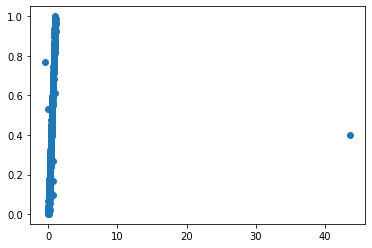

In [695]:
plt.scatter(predict_list,target_list)

In [718]:
target_np = np.array(target_list).reshape(-1,1)
predict_np = np.array(predict_list).reshape(-1,1)

initialize_target = scaler.inverse_transform(target_np)
initialize_predict = scaler.inverse_transform(predict_np)

In [722]:
mae = 0
for target, pred in zip(initialize_target, initialize_predict):
    #print(target, pred)
    #print(abs(target - pred))
    mae += abs(pred - target)
print(mae)
print('MAE = ', mae/len(initialize_target))

[13.29312962]
MAE =  [0.02658626]


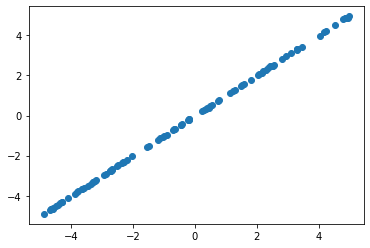

In [720]:
#x = np.arange(min(train_), max(train_dataloader))
#y = x
#plt.plot(x, y)
plt.scatter(initialize_target[0:100], initialize_predict[0:100])

In [723]:
show = pd.DataFrame(
{'True label(XZ theta)': list(initialize_target),'Predict label(XZ theta)': list(initialize_predict)})
show[0:10]

,True label(XZ theta),Predict label(XZ theta)
0,[-1.0082168953237625],[-1.0122430490861258]
1,[-4.475240749833411],[-4.5056637873261645]
2,[1.5364953977513],[1.5267596208158052]
3,[1.1315998643257652],[1.1449074309767837]
4,[-0.6701158542675906],[-0.6929525604697614]
5,[2.170067651526665],[2.142194233518242]
6,[4.865958415622928],[4.862993437131165]
7,[-2.6954958478985067],[-2.710920256745467]
8,[0.5011349127737419],[0.49274079009451166]
9,[4.872322489762608],[4.871821081469765]


In [576]:
list(initialize_target[0:10])

[array([4830.22252806]),
 array([3895.11194705]),
 array([4510.59264138]),
 array([3053.35903085]),
 array([4274.35968552]),
 array([3230.16756686]),
 array([4084.83281917]),
 array([4315.25119073]),
 array([4103.99637729]),
 array([4516.48726304])]

In [146]:
error = 0
for i in range(len(predict_list)):
    error += abs(target_list[i] - predict_list[i])
error/len(predict_list)

0.24215323996148072

In [23]:
target_list[0:10]

[3753.486219576346,
 3447.7775501456786,
 4631.307662708655,
 5540.1924845399035,
 3382.7540961193695,
 5208.0791750061435,
 4905.345968567649,
 4845.479940495234,
 3341.48695651458,
 5408.041980819703]